In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import random
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocess Original Data

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/Project Deep Learning/compressed_dataset.csv.zip") as z:
   # open the csv file in the dataset
   with z.open("compressed_dataset.csv") as f:
     df = pd.read_csv(f)


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.000000,0.0,0
20615366,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.000000,0.0,0
20615367,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.000000,0.0,0
20615368,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.000000,0.9,0


In [ ]:
df.isnull().sum()

timestamp      0
customer_id    0
event_id       0
viewer_id      0
city_id        0
country_id     0
viewer_type    0
qoe            0
engagement     0
buffer_ms      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20615370 entries, 0 to 20615369
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   timestamp    int64  
 1   customer_id  float64
 2   event_id     float64
 3   viewer_id    float64
 4   city_id      float64
 5   country_id   float64
 6   viewer_type  object 
 7   qoe          float64
 8   engagement   float64
 9   buffer_ms    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 1.5+ GB


In [ ]:
df['event_id'] = df['event_id'].astype(int)
df['customer_id'] = df['customer_id'].astype(int)
df['viewer_id'] = df['viewer_id'].astype(int)
df['city_id'] = df['city_id'].astype(int)
df['country_id'] = df['country_id'].astype(int)
df['buffer_ms'] = df['buffer_ms'].astype(int)

In [ ]:
df

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,1632762065906,5,107,11661,2,3,WFO,0.999976,0.0,785
1,1632762104254,5,107,12810,2,3,WFH,0.281964,0.9,3895
2,1632762108299,5,107,15129,19,3,WFH,1.000000,0.9,0
3,1632762112510,5,107,5860,217,3,WFH,0.999988,0.0,466
4,1632762129231,5,107,4483,2,3,WFO,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
20615365,1647872264309,1,401,845,19,3,WFO,1.000000,0.0,0
20615366,1647872276879,1,401,11100,3963,3,WFO,1.000000,0.0,0
20615367,1647872288293,1,401,2155,6,1,WFO,1.000000,0.0,0
20615368,1647872288564,1,401,1011,19,3,WFO,1.000000,0.9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20615370 entries, 0 to 20615369
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   timestamp    int64  
 1   customer_id  int64  
 2   event_id     int64  
 3   viewer_id    int64  
 4   city_id      int64  
 5   country_id   int64  
 6   viewer_type  object 
 7   qoe          float64
 8   engagement   float64
 9   buffer_ms    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.5+ GB


In [ ]:
df_old=df #Keep old dataframe to visualize correlations

## Timestamp handling

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [ ]:
def day_of_week(date):
  return date.isoweekday()
df['day_of_week'] =  df['timestamp'].apply(day_of_week)

In [ ]:
def day_of_year(date):
  return date.timetuple().tm_yday
df['day_of_year'] =  df['timestamp'].apply(day_of_year)

In [ ]:
def month_of_year(date):
  return date.month
df['month_of_year'] =  df['timestamp'].apply(month_of_year)

In [ ]:
def nmsm(date): #number of miliseconds from midnight
  return 3600000*date.hour + 60000*date.minute + 1000*date.second + date.microsecond / 1000

df['nmsm'] =  df['timestamp'].apply(nmsm)

In [ ]:
df.drop('timestamp', axis=1, inplace=True)

In [ ]:
df.to_csv("//content//drive//MyDrive//Project Deep Learning//compressed_dataset_preprocessed.csv")

# EDA

## Load Preprocessed Data

In [4]:
df = pd.read_csv('//content//drive//MyDrive//Project Deep Learning//compressed_dataset_preprocessed.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,day_of_week,day_of_year,month_of_year,nmsm
0,5,107,11661,2,3,WFO,0.999976,0.0,785,1,270,9,61265906.0
1,5,107,12810,2,3,WFH,0.281964,0.9,3895,1,270,9,61304254.0
2,5,107,15129,19,3,WFH,1.000000,0.9,0,1,270,9,61308299.0
3,5,107,5860,217,3,WFH,0.999988,0.0,466,1,270,9,61312510.0
4,5,107,4483,2,3,WFO,1.000000,0.0,0,1,270,9,61329231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,1,401,845,19,3,WFO,1.000000,0.0,0,1,80,3,51464309.0
20615366,1,401,11100,3963,3,WFO,1.000000,0.0,0,1,80,3,51476879.0
20615367,1,401,2155,6,1,WFO,1.000000,0.0,0,1,80,3,51488293.0
20615368,1,401,1011,19,3,WFO,1.000000,0.9,0,1,80,3,51488564.0


nmsm = #of milisecs starting from midnight


33 Companies, 731 events, 101336 users, 8234 cities, 124 countries

##Viewers’ engagement distribution over time, taking into account the customer id/country/city parameters.



In [6]:
#Taking a random sample from the population for the city and country without replacement.
rng = np.random.default_rng()
numbers = rng.choice(20, size=10, replace=False)
a = random.sample(range(0,124), 30)
b = random.sample(range(0,8243), 100)
ar_a = np.array(a)
ar_b = np.array(b)

Customer_id: 0


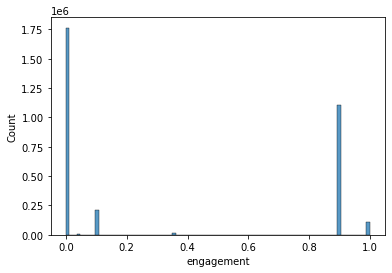

Customer_id: 1


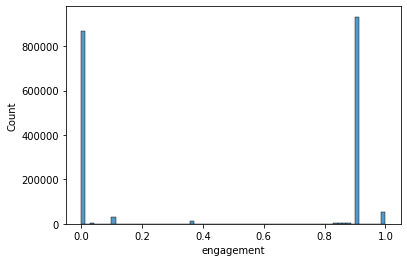

Customer_id: 2


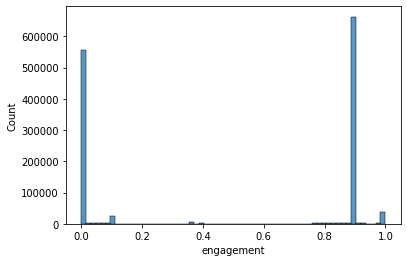

Customer_id: 3


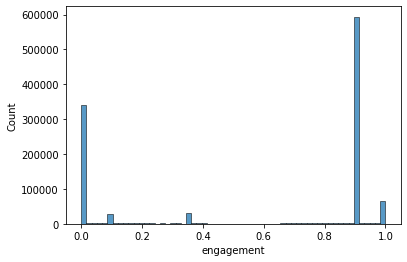

Customer_id: 4


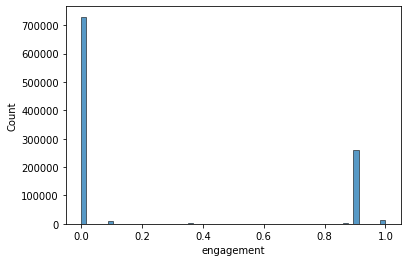

Customer_id: 5


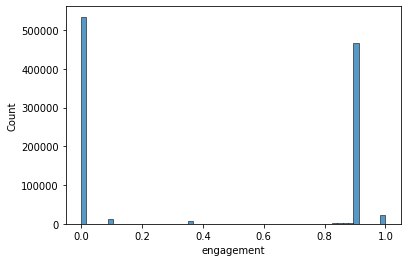

Customer_id: 6


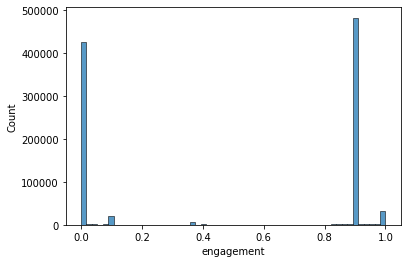

Customer_id: 7


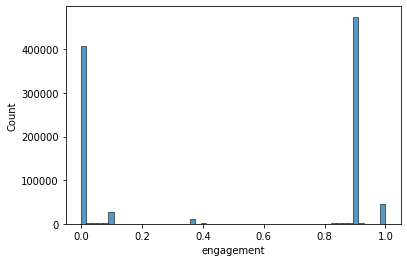

Customer_id: 8


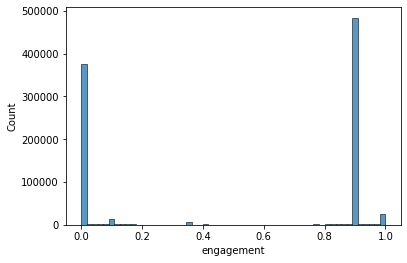

Customer_id: 9


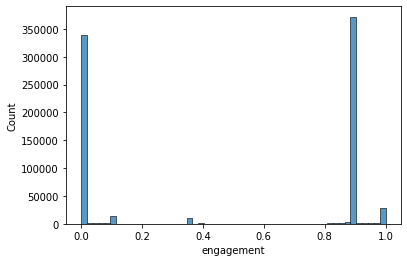

Customer_id: 10


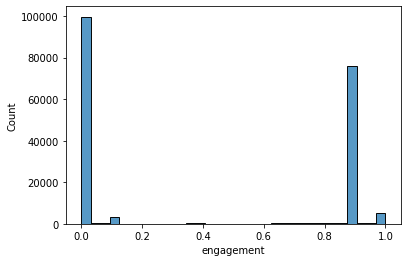

Customer_id: 11


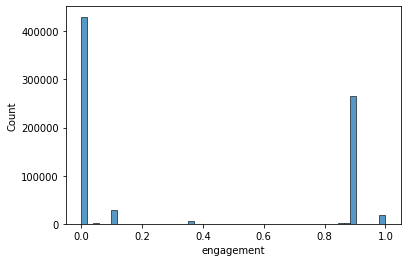

Customer_id: 12


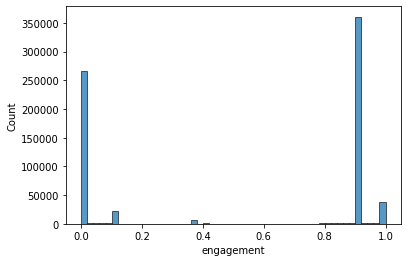

Customer_id: 13


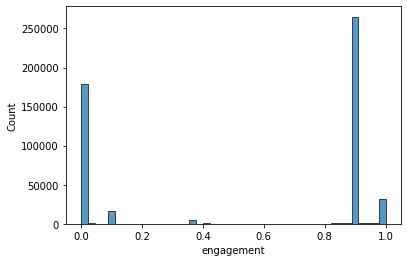

Customer_id: 14


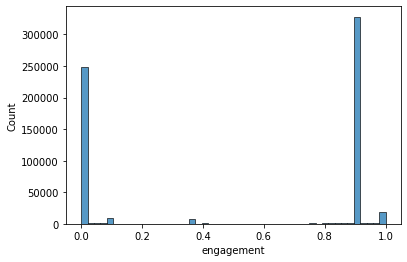

Customer_id: 15


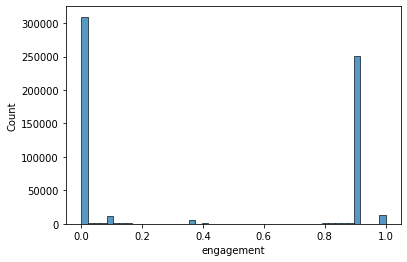

Customer_id: 16


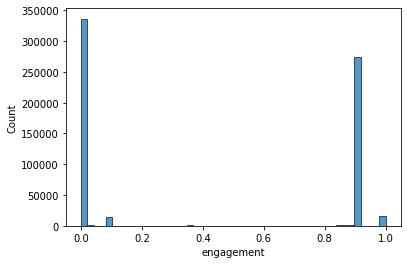

Customer_id: 17


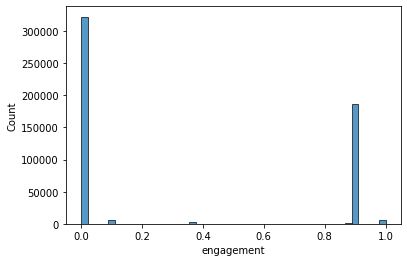

Customer_id: 18


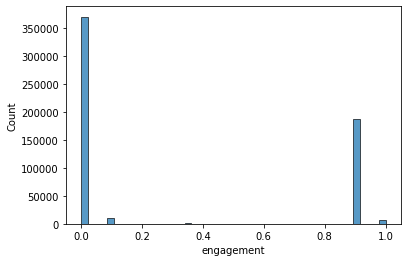

Customer_id: 19


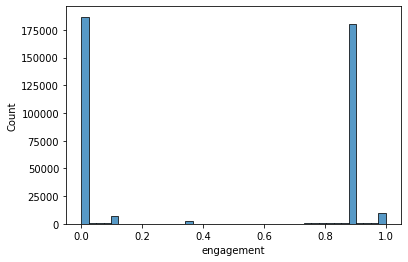

Customer_id: 20


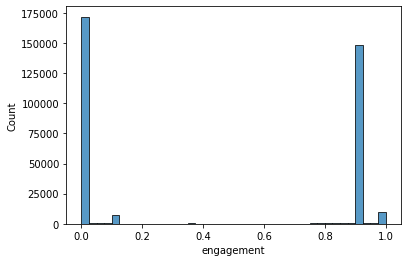

Customer_id: 21


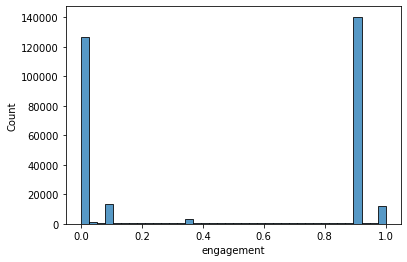

Customer_id: 22


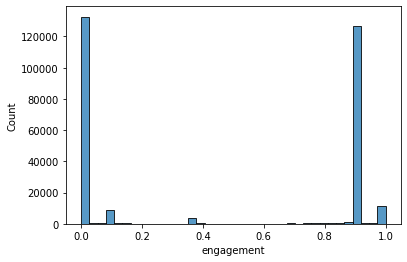

Customer_id: 23


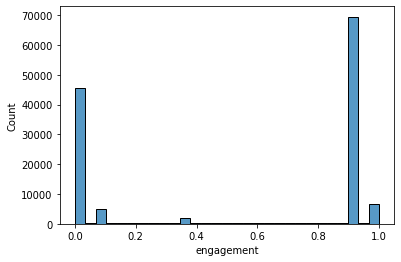

Customer_id: 24


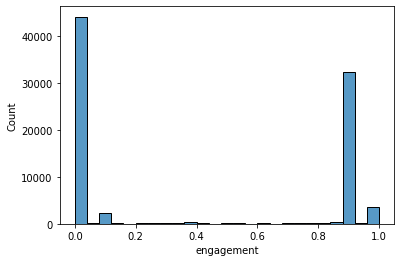

Customer_id: 25


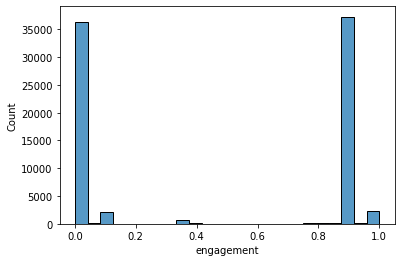

Customer_id: 26


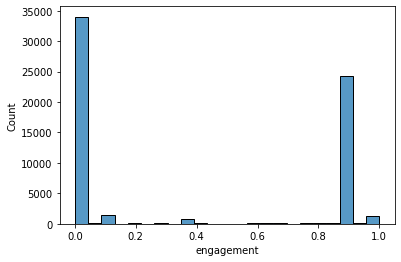

Customer_id: 27


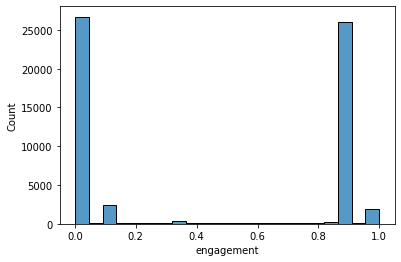

Customer_id: 28


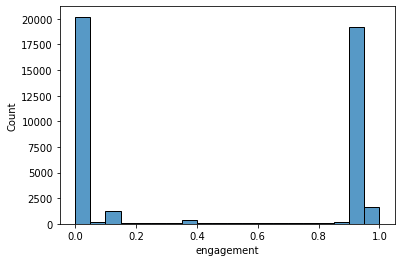

Customer_id: 29


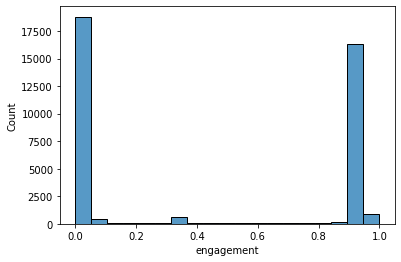

Customer_id: 30


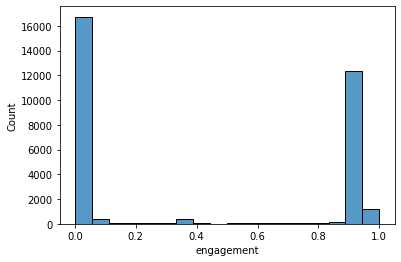

Customer_id: 31


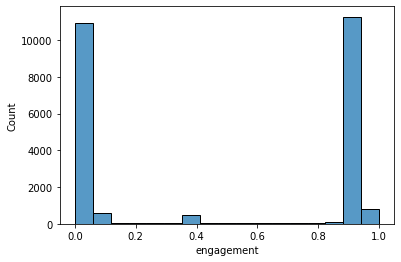

Customer_id: 32


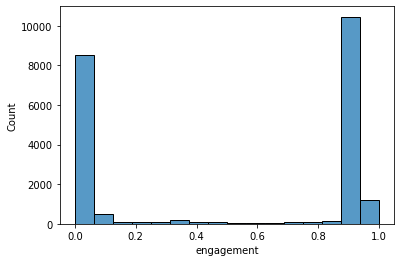

In [7]:
#Plotting using histogram for every customer.
for i in range(0, 33):
    print("Customer_id:", i)
    sns.histplot(df['engagement'][df['customer_id'] == i])
    plt.show()

Country ID: 59


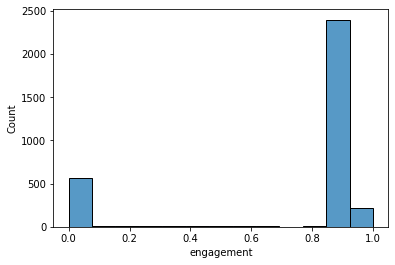

Country ID: 69


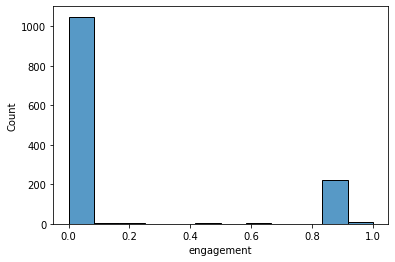

Country ID: 39


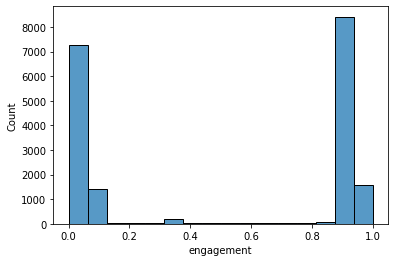

Country ID: 37


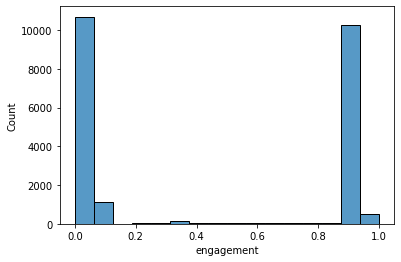

Country ID: 42


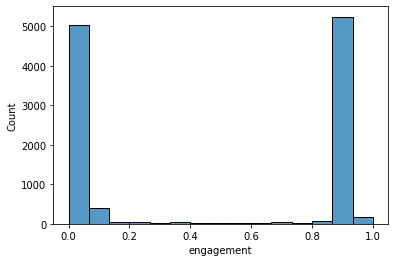

Country ID: 12


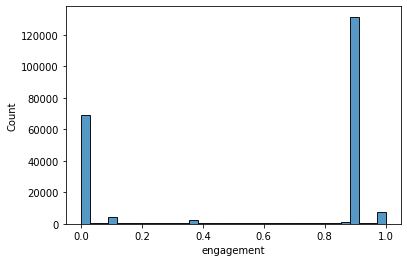

Country ID: 80


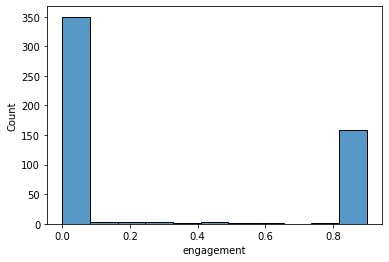

Country ID: 26


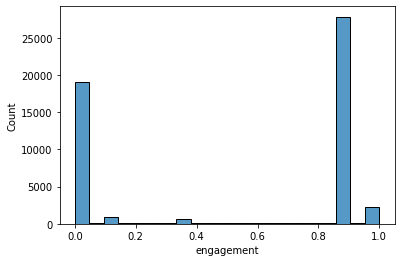

Country ID: 27


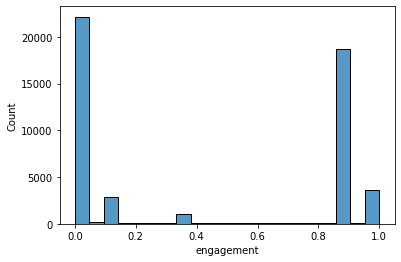

Country ID: 78


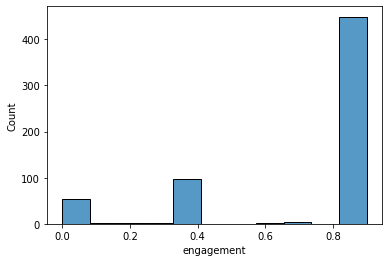

Country ID: 58


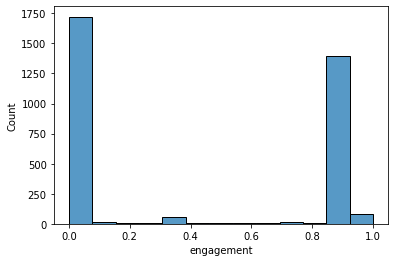

Country ID: 96


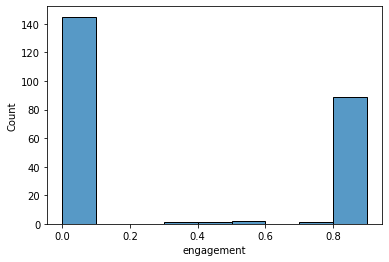

Country ID: 123


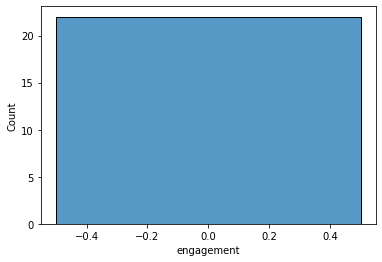

Country ID: 11


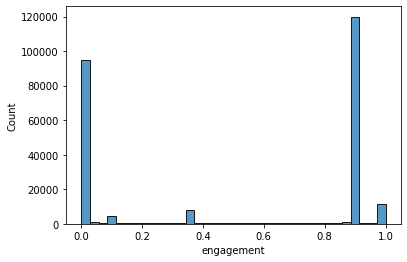

Country ID: 92


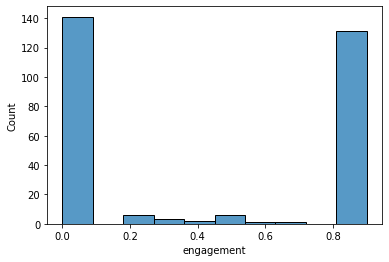

Country ID: 112


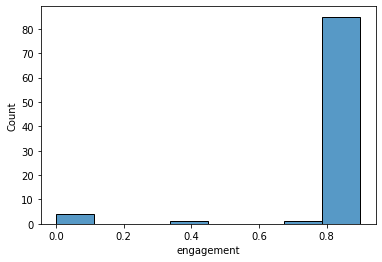

Country ID: 52


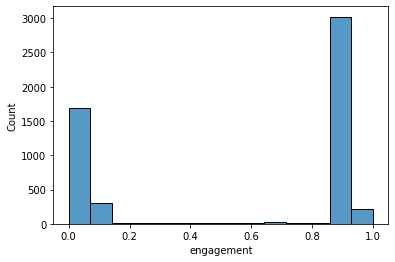

Country ID: 66


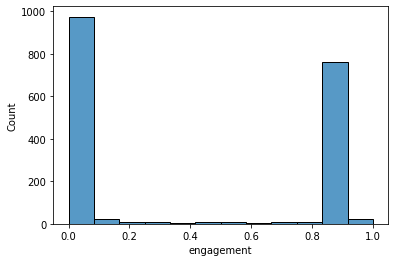

Country ID: 63


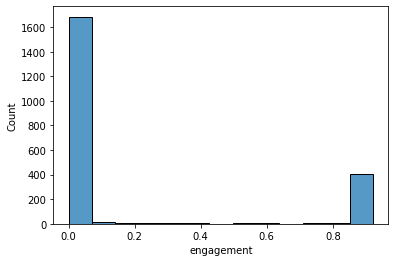

Country ID: 53


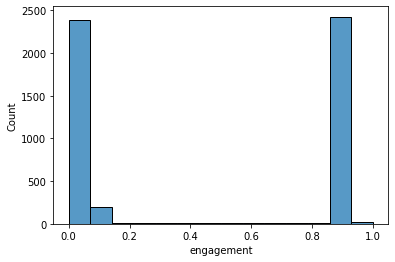

Country ID: 50


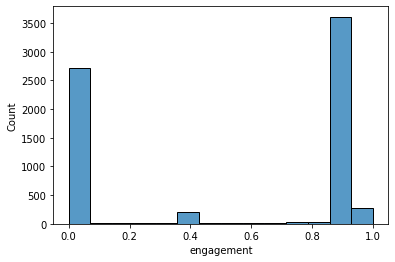

Country ID: 62


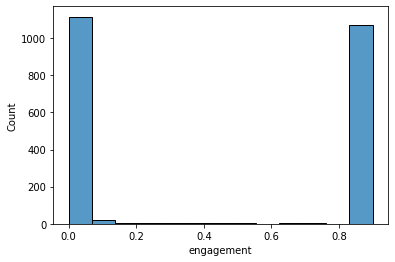

Country ID: 105


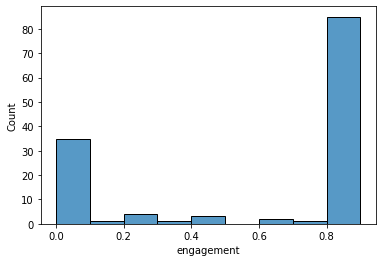

Country ID: 15


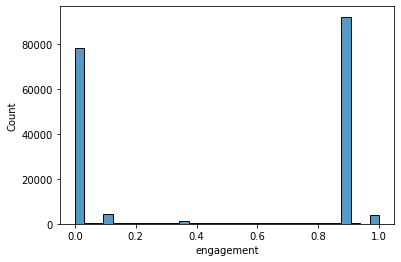

Country ID: 8


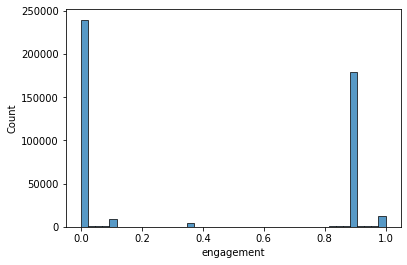

Country ID: 122


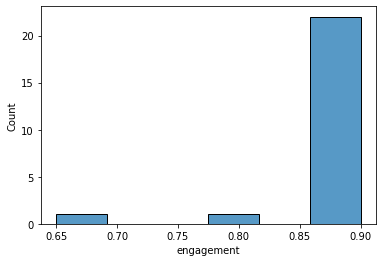

Country ID: 93


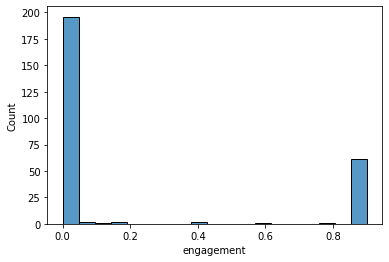

Country ID: 16


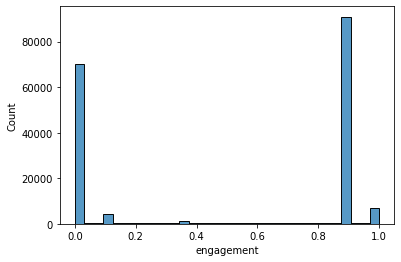

Country ID: 1


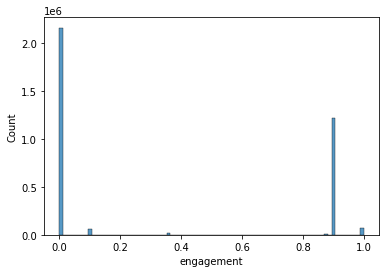

Country ID: 60


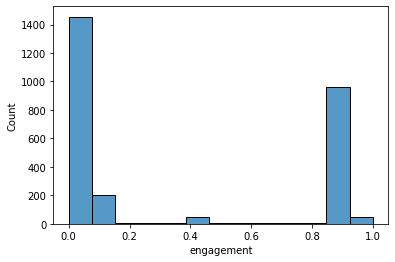

In [8]:
#Plotting using histogram for every country in a random sample.
for i in ar_a:
  print("Country ID:", i)
  sns.histplot(df["engagement"][df["country_id"]== i])
  plt.show()

City ID: 731


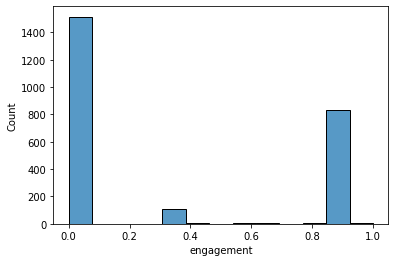

City ID: 6692


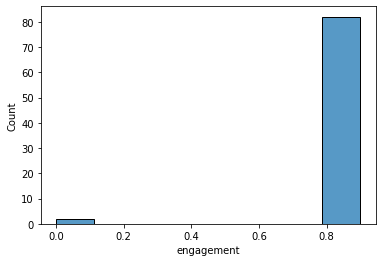

City ID: 370


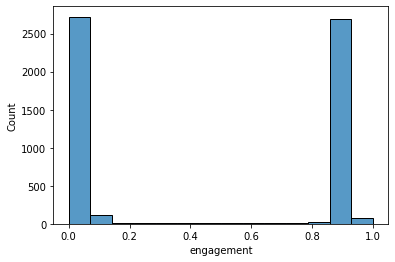

City ID: 6454


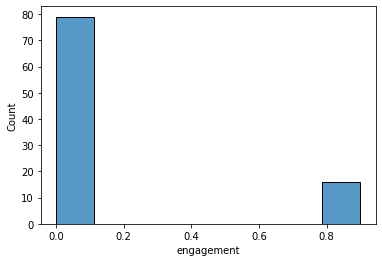

City ID: 2047


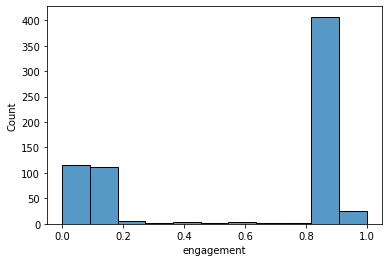

City ID: 4746


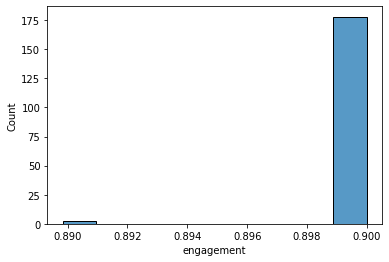

City ID: 7785


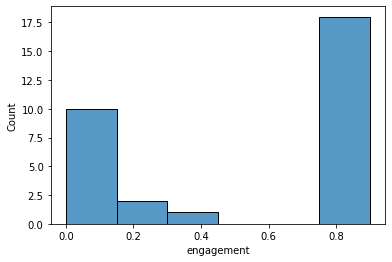

City ID: 220


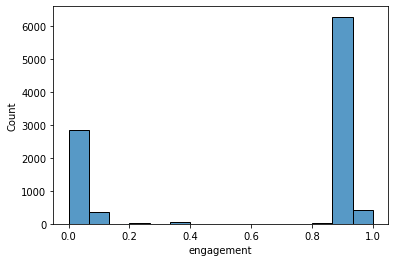

City ID: 2942


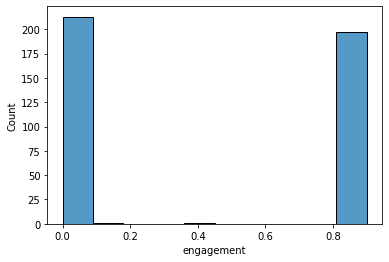

City ID: 4406


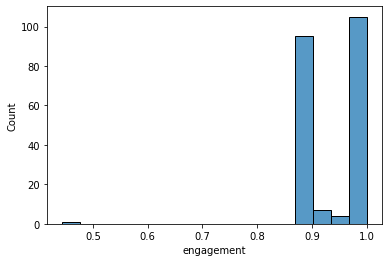

City ID: 2020


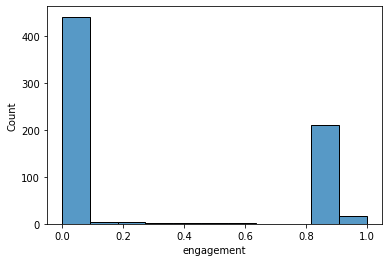

City ID: 3167


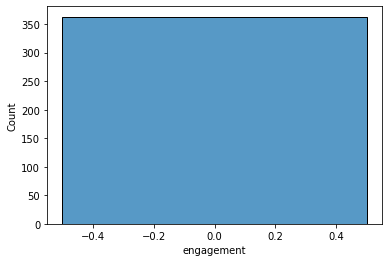

City ID: 4006


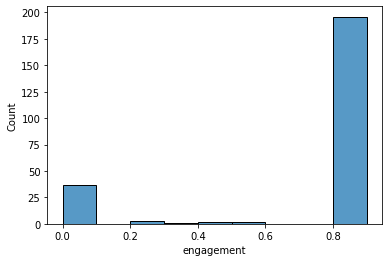

City ID: 1471


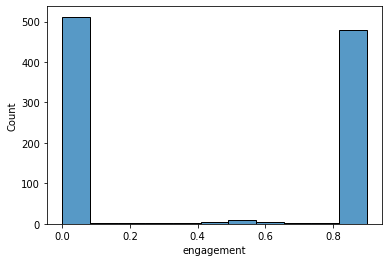

City ID: 4037


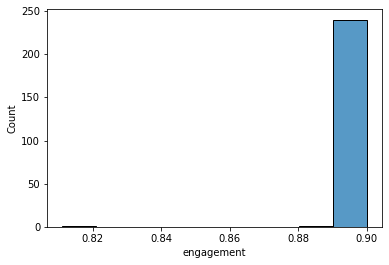

City ID: 942


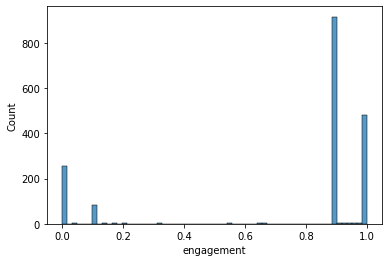

City ID: 493


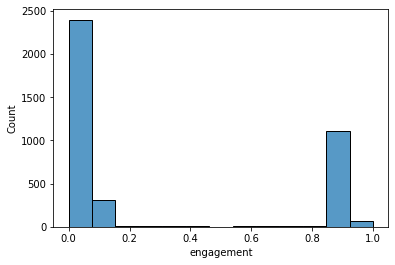

City ID: 3775


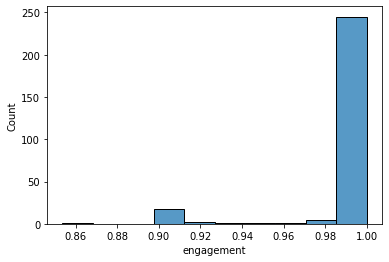

City ID: 5670


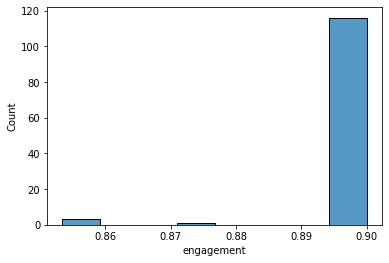

City ID: 5023


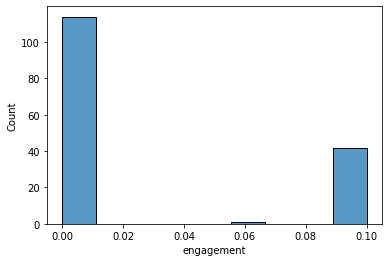

City ID: 1864


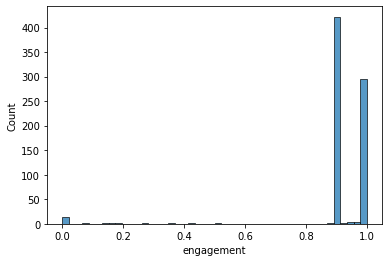

City ID: 685


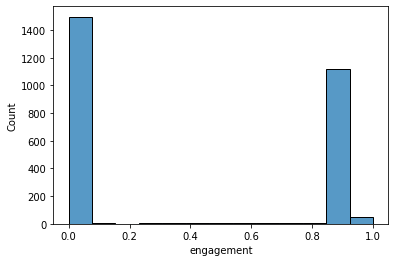

City ID: 4924


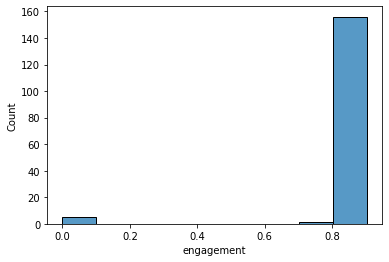

City ID: 2877


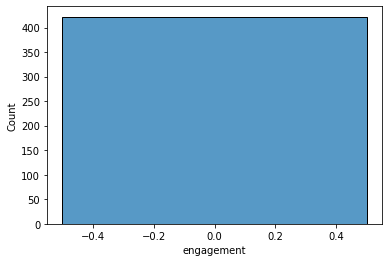

City ID: 4475


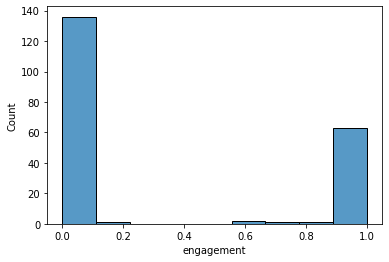

City ID: 1342


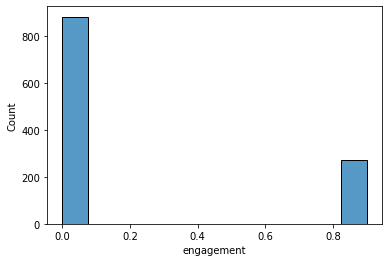

City ID: 3347


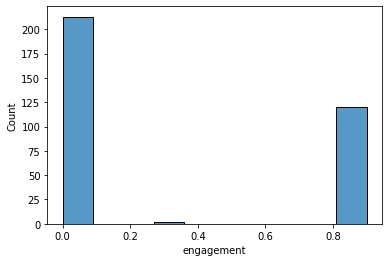

City ID: 5428


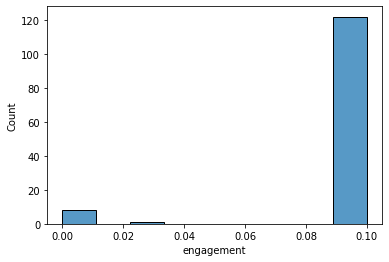

City ID: 8226


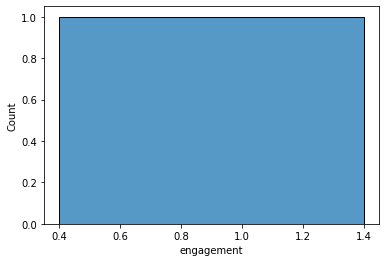

City ID: 7358


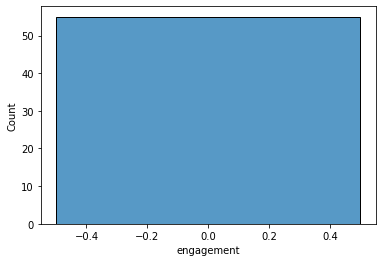

City ID: 1493


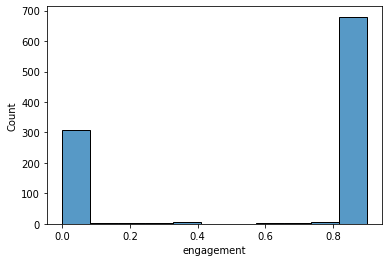

City ID: 2019


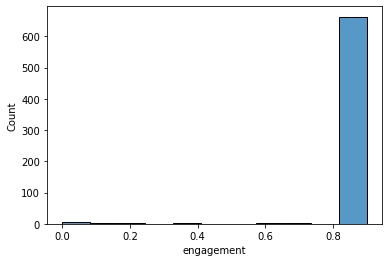

City ID: 7842


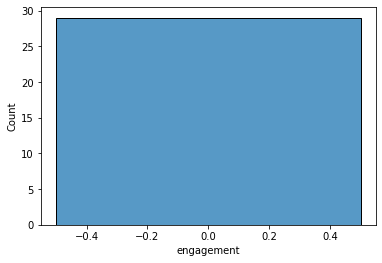

City ID: 7618


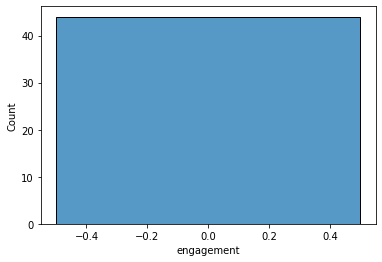

City ID: 7149


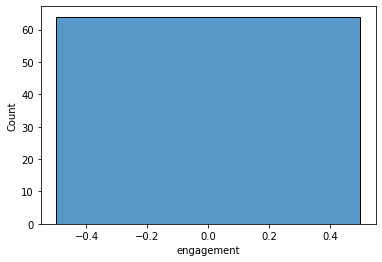

City ID: 4237


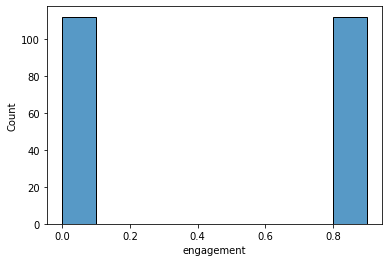

City ID: 7193


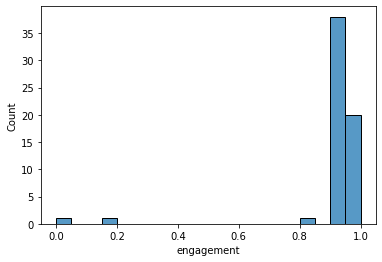

City ID: 6415


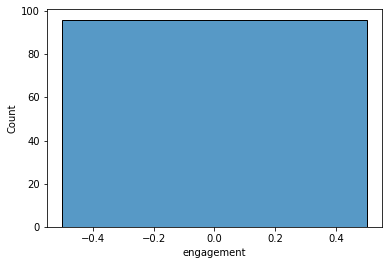

City ID: 1663


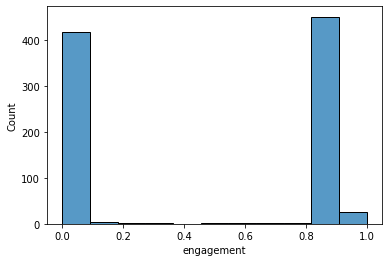

City ID: 7107


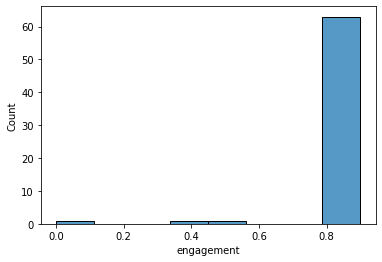

City ID: 3295


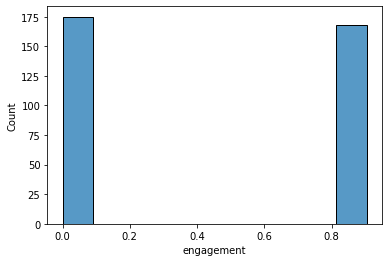

City ID: 1313


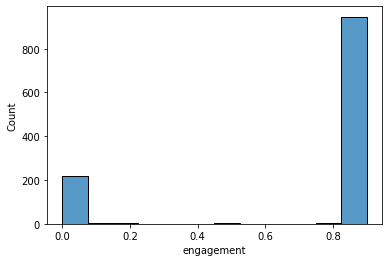

City ID: 7424


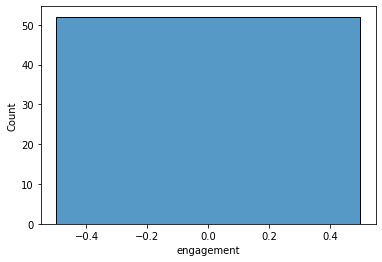

City ID: 7420


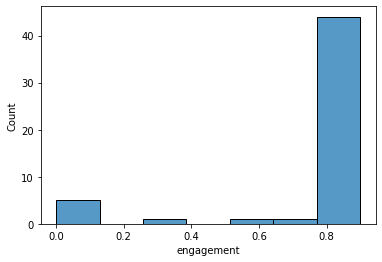

City ID: 7103


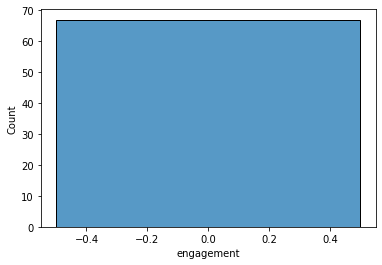

City ID: 1540


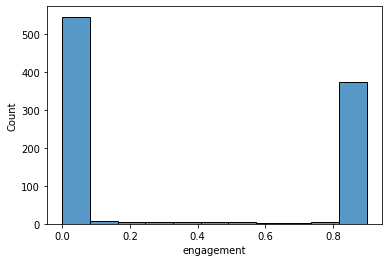

City ID: 7892


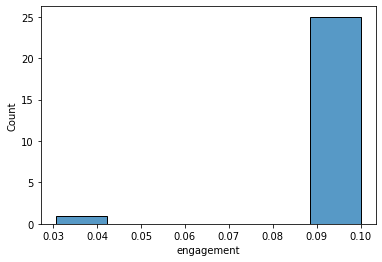

City ID: 7774


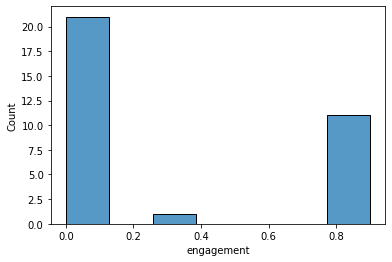

City ID: 2702


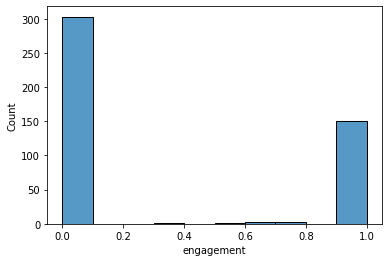

City ID: 7883


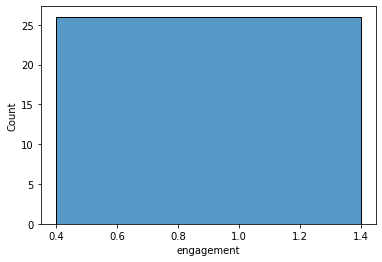

City ID: 1157


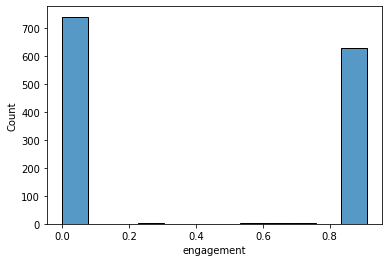

City ID: 8172


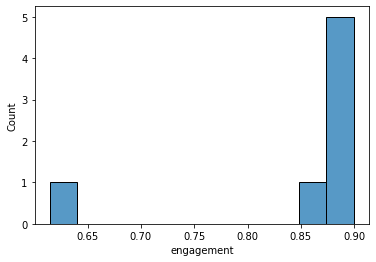

City ID: 3553


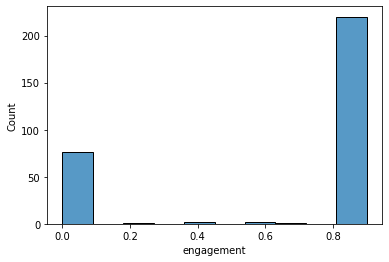

City ID: 4198


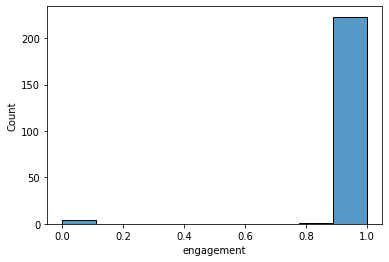

City ID: 4629


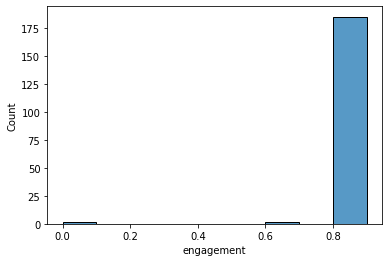

City ID: 439


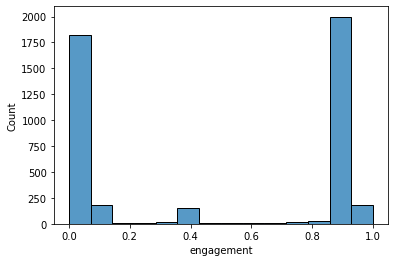

City ID: 7610


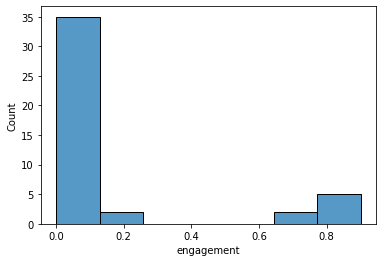

City ID: 1560


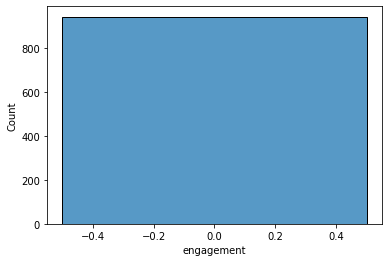

City ID: 5094


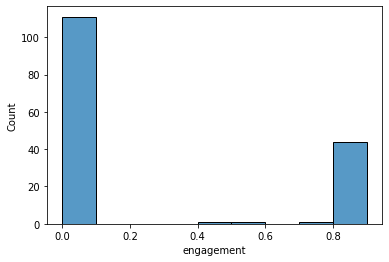

City ID: 2319


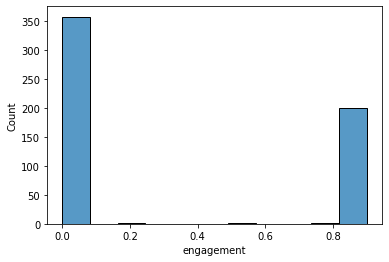

City ID: 2102


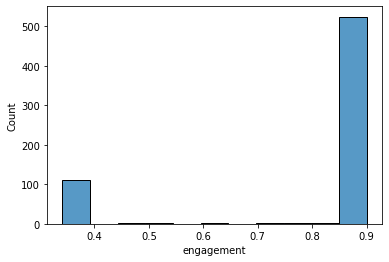

City ID: 6715


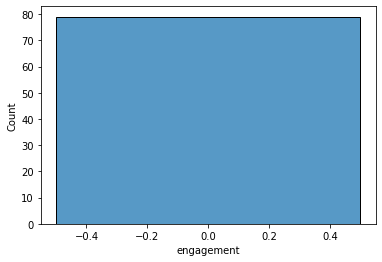

City ID: 1429


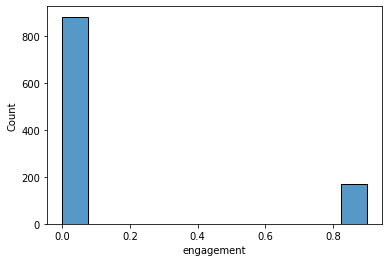

City ID: 5261


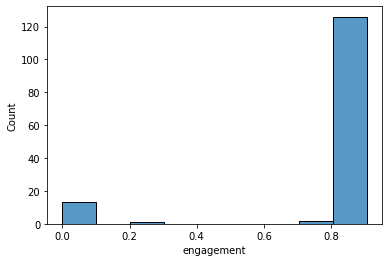

City ID: 6579


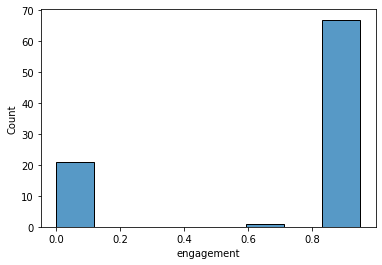

City ID: 7802


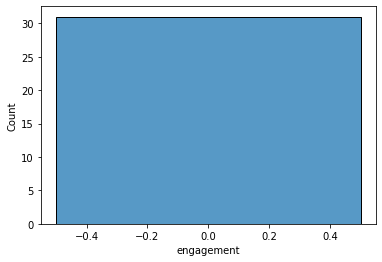

City ID: 784


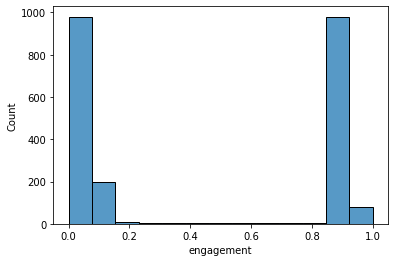

City ID: 850


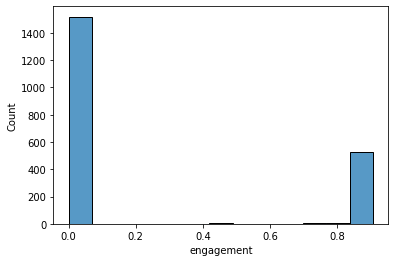

City ID: 1317


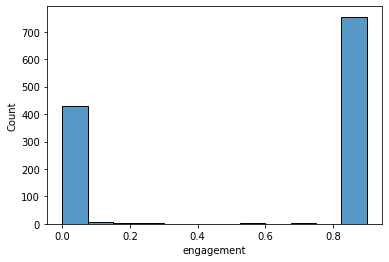

City ID: 4052


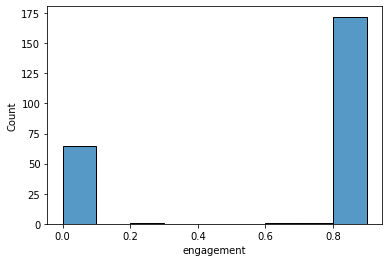

City ID: 3057


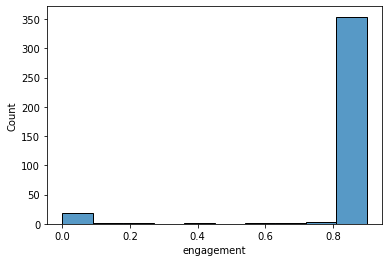

City ID: 2388


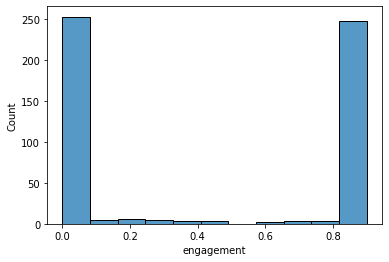

City ID: 4868


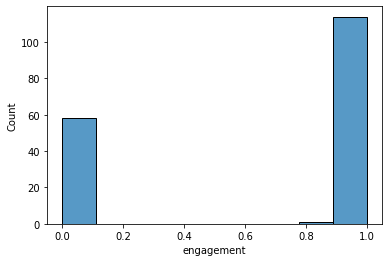

City ID: 5515


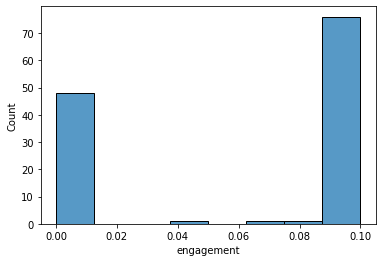

City ID: 5145


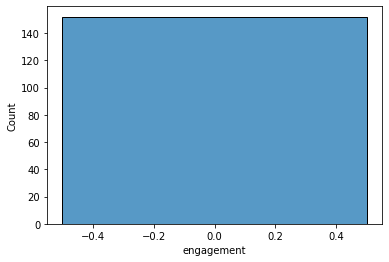

City ID: 6126


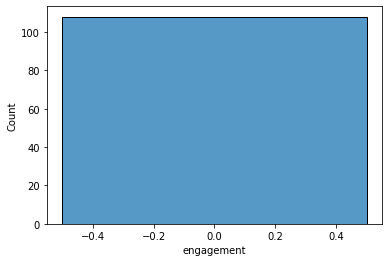

City ID: 1586


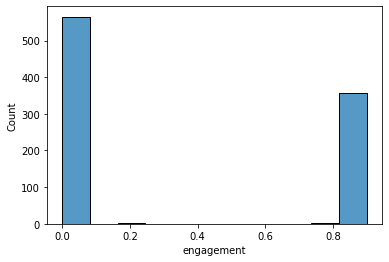

City ID: 596


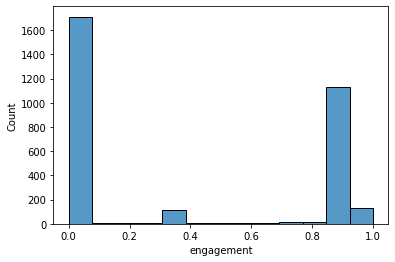

City ID: 3246


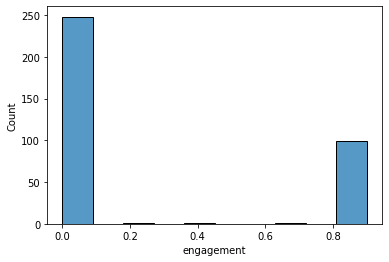

City ID: 8113


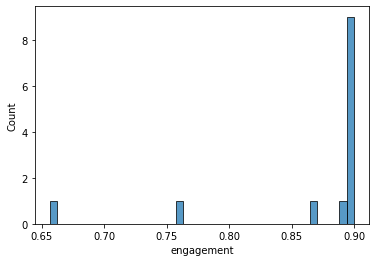

City ID: 1262


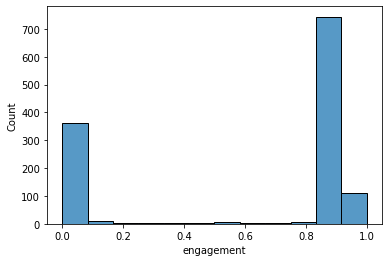

City ID: 5411


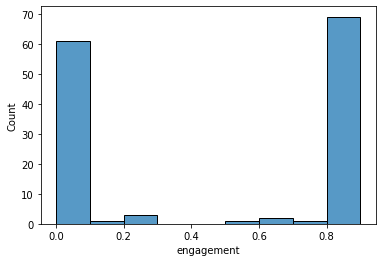

City ID: 5345


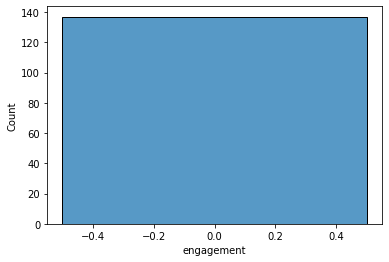

City ID: 1595


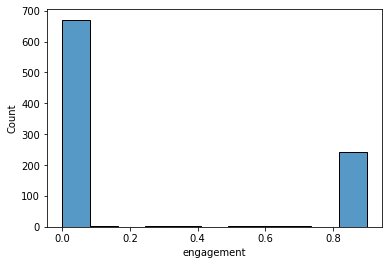

City ID: 6020


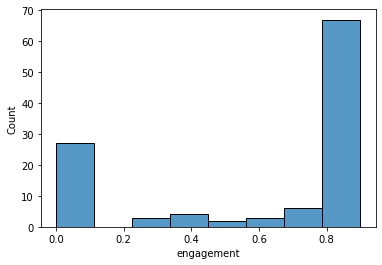

City ID: 3712


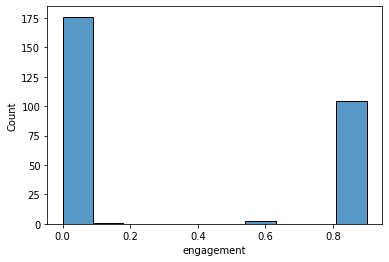

City ID: 1203


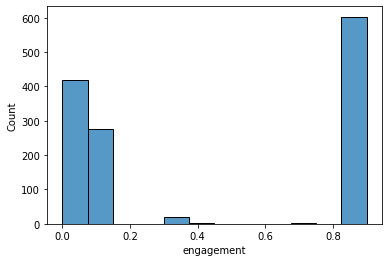

City ID: 4376


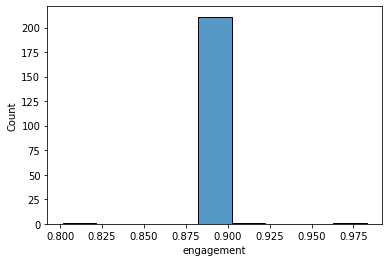

City ID: 2347


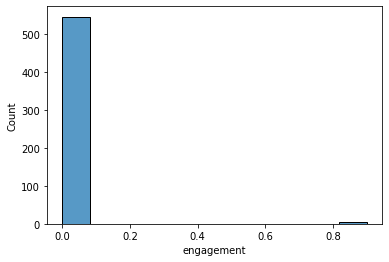

City ID: 5031


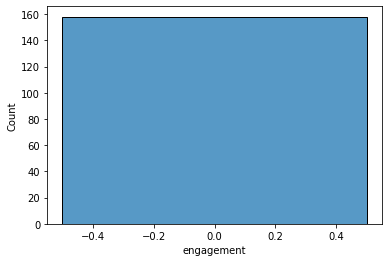

City ID: 4179


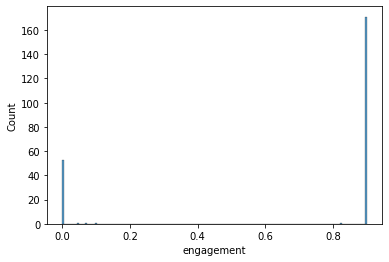

City ID: 4886


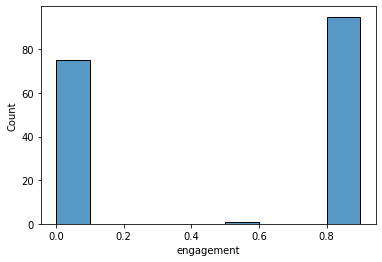

City ID: 8080


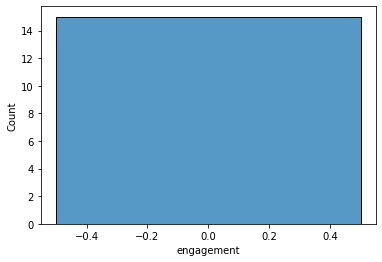

City ID: 7342


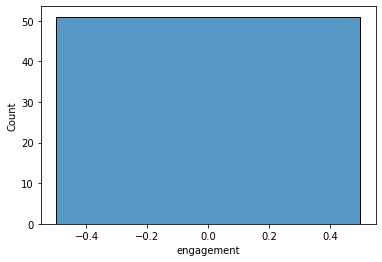

City ID: 4385


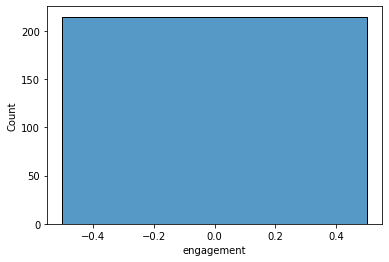

City ID: 984


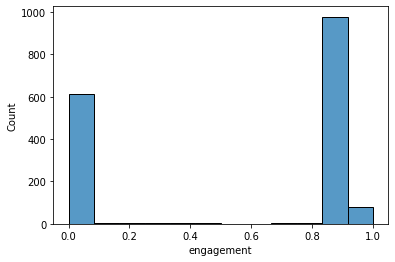

City ID: 5448


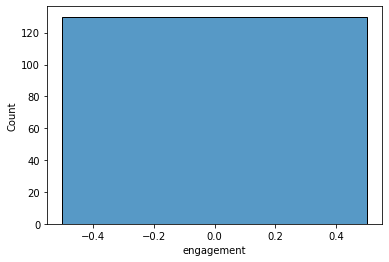

City ID: 5942


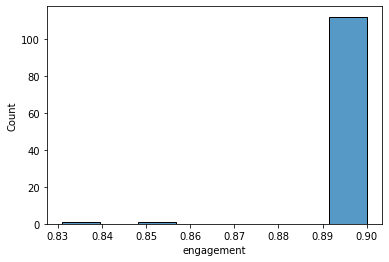

City ID: 1628


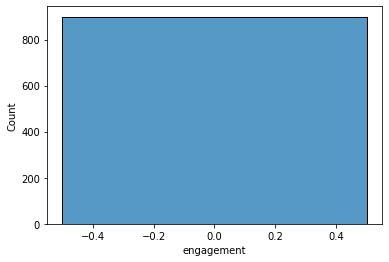

City ID: 7040


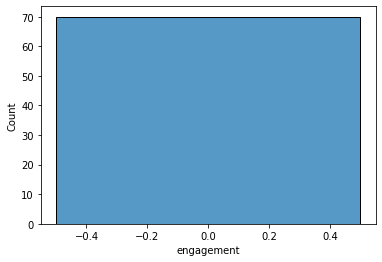

In [9]:
#Plotting using histogram for every city in a random sample.
for i in ar_b:
  print("City ID:", i)
  sns.histplot(df["engagement"][df["city_id"]== i])
  plt.show()

## Viewers’ QoE distribution over time, taking into account the customer id/country/city parameters.

**Customer_id**

Customer_id: 0


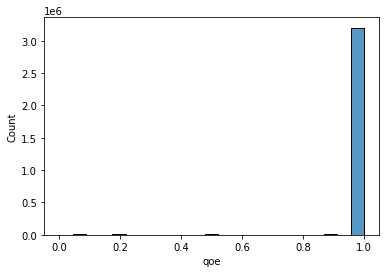

Customer_id: 1


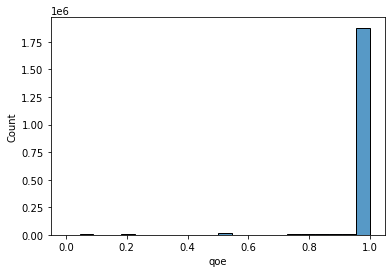

Customer_id: 2


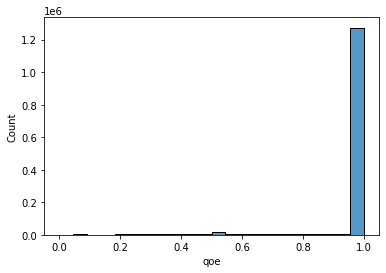

Customer_id: 3


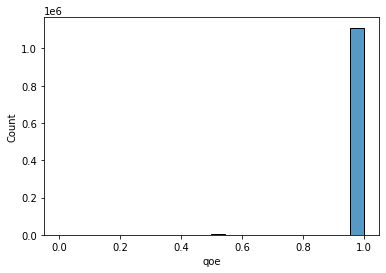

Customer_id: 4


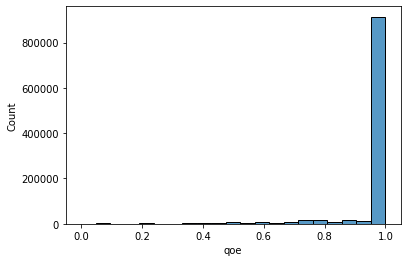

Customer_id: 5


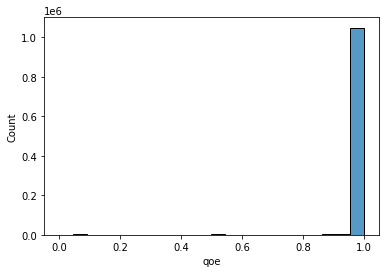

Customer_id: 6


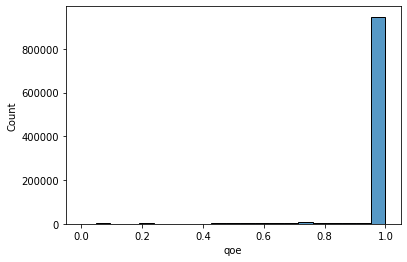

Customer_id: 7


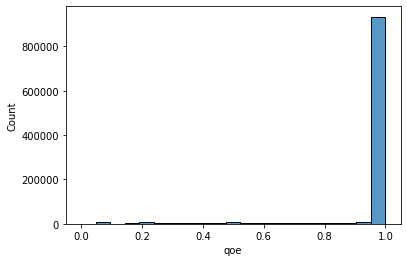

Customer_id: 8


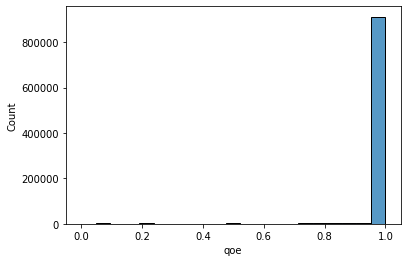

Customer_id: 9


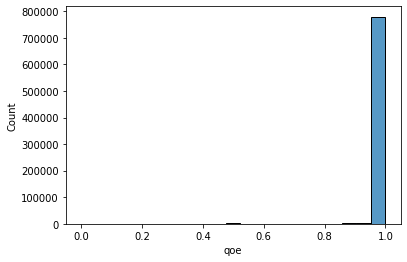

Customer_id: 10


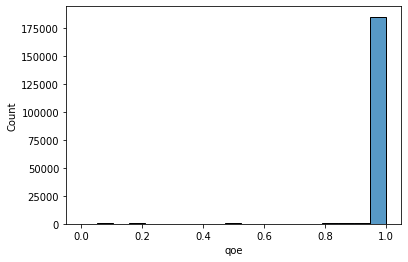

Customer_id: 11


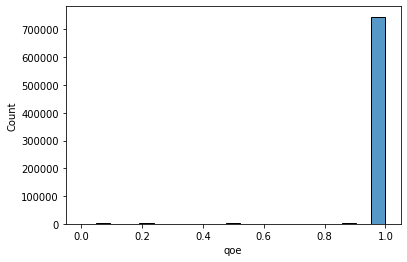

Customer_id: 12


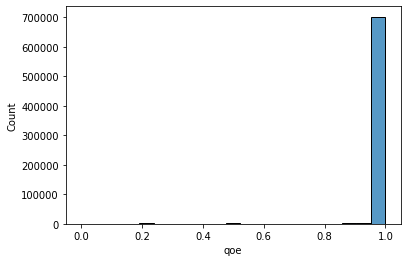

Customer_id: 13


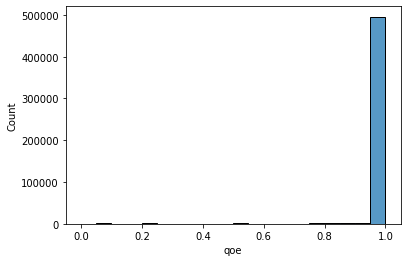

Customer_id: 14


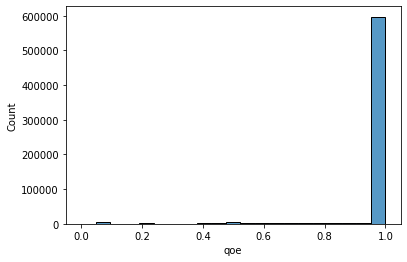

Customer_id: 15


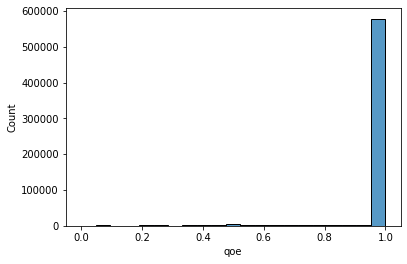

Customer_id: 16


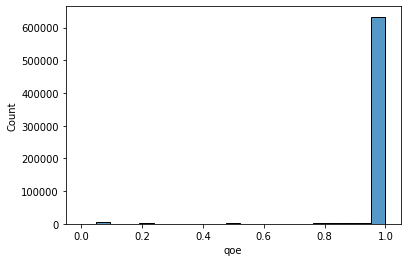

Customer_id: 17


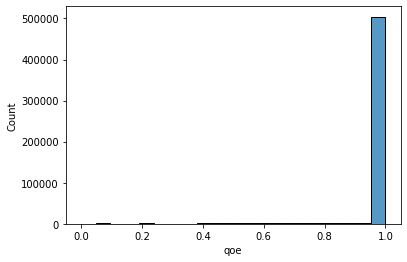

Customer_id: 18


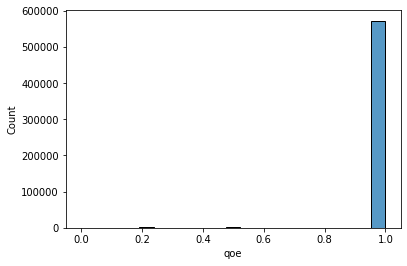

Customer_id: 19


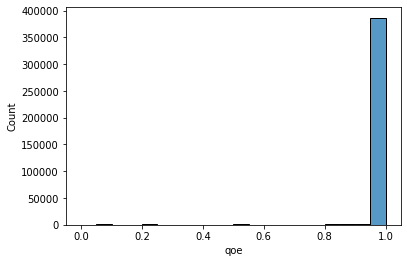

Customer_id: 20


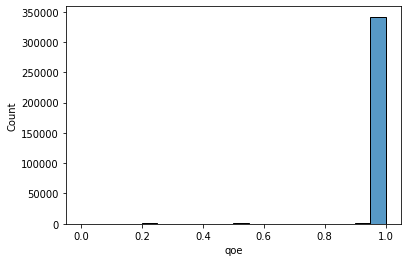

Customer_id: 21


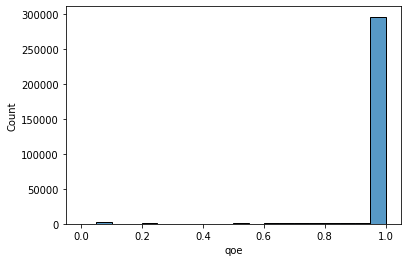

Customer_id: 22


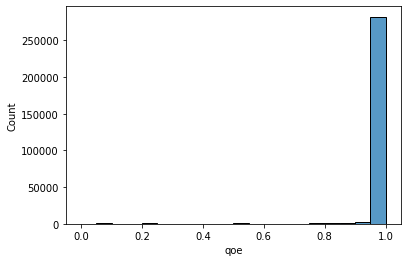

Customer_id: 23


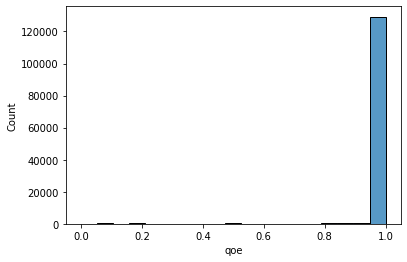

Customer_id: 24


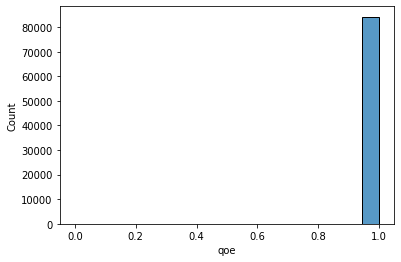

Customer_id: 25


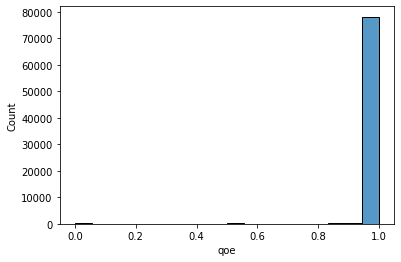

Customer_id: 26


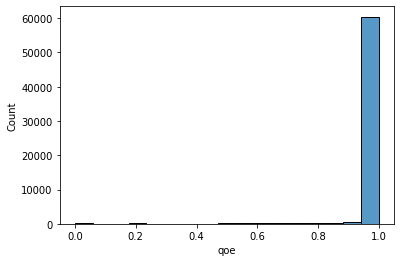

Customer_id: 27


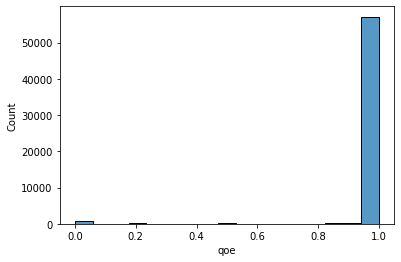

Customer_id: 28


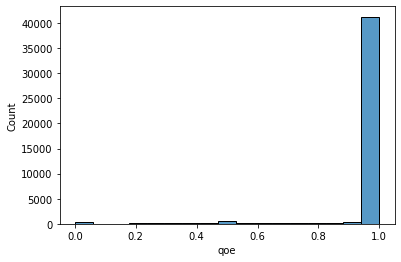

Customer_id: 29


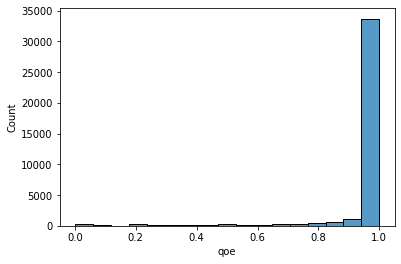

Customer_id: 30


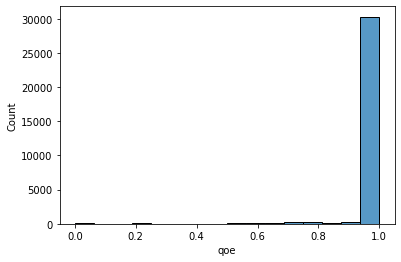

Customer_id: 31


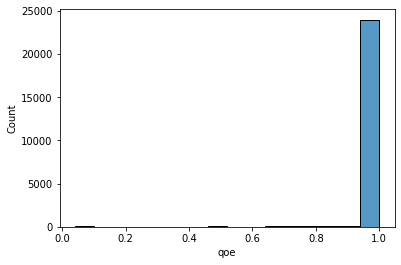

Customer_id: 32


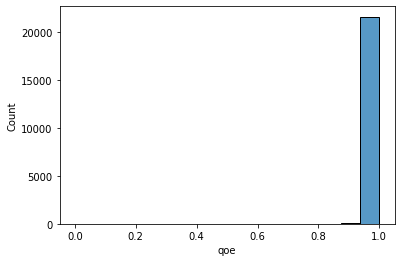

In [10]:
#Plotting using histogram for every customer.
for i in range(0, 33):
    print("Customer_id:", i)
    sns.histplot(df['qoe'][df['customer_id'] == i])
    plt.show()

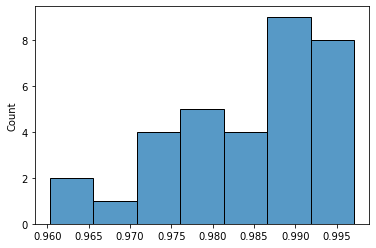

In [11]:
#Calculate the standard deviations of every customer's qoe
means = []
for i in range(0,33):
  means.append(df["qoe"][df["customer_id"] == i].mean())
sns.histplot(np.array(means))  

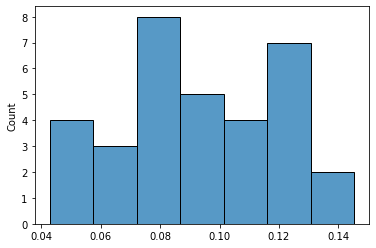

In [12]:
#Calculate the standard deviations of every customer's qoe
stds = []
for i in range(0,33):
  stds.append(df["qoe"][df["customer_id"] == i].std())
sns.histplot(np.array(stds))

Country_id

Country ID: 59


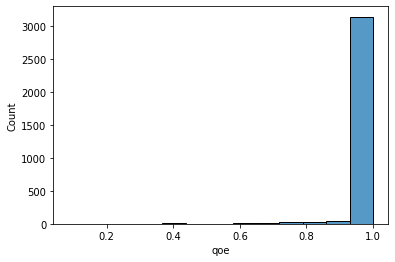

Country ID: 69


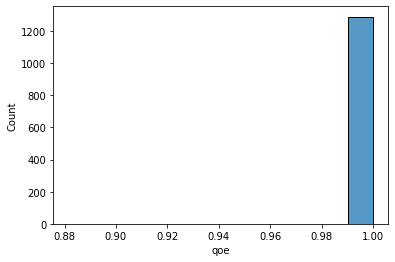

Country ID: 39


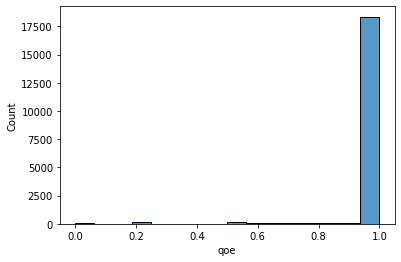

Country ID: 37


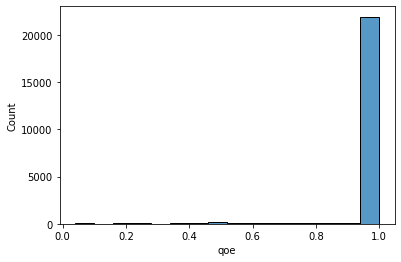

Country ID: 42


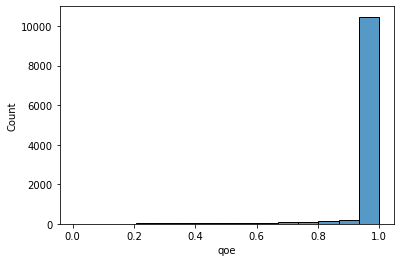

Country ID: 12


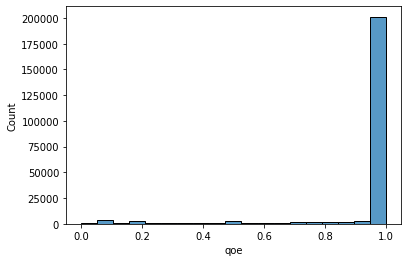

Country ID: 80


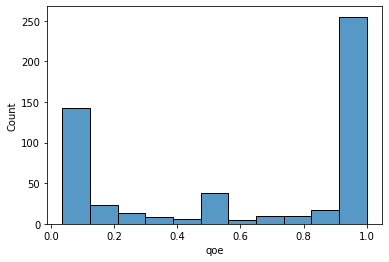

Country ID: 26


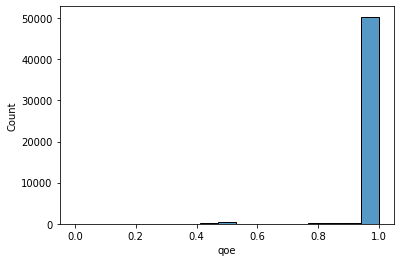

Country ID: 27


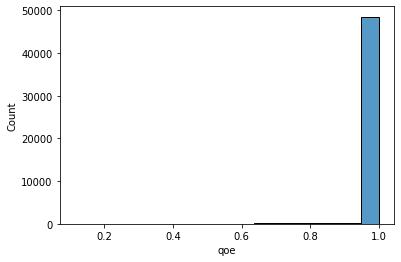

Country ID: 78


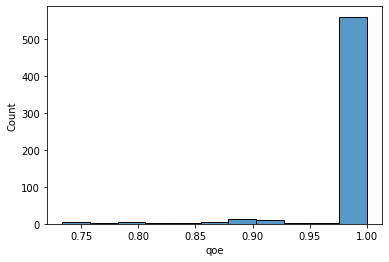

Country ID: 58


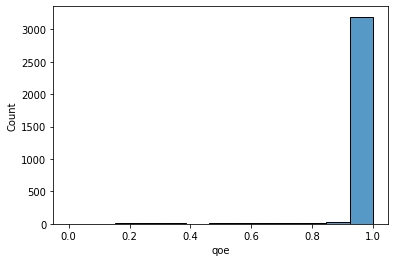

Country ID: 96


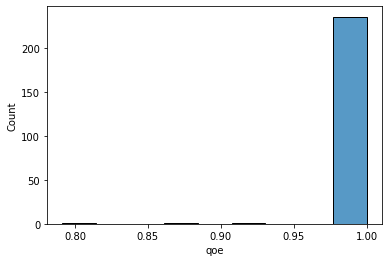

Country ID: 123


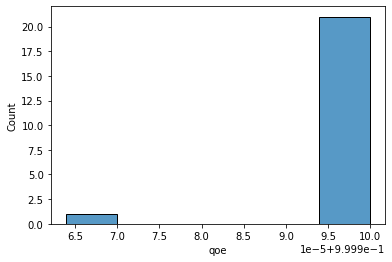

Country ID: 11


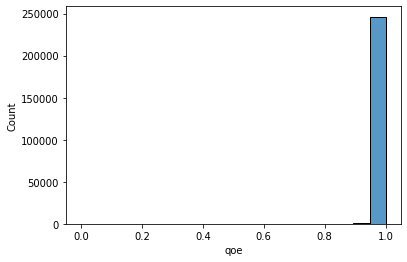

Country ID: 92


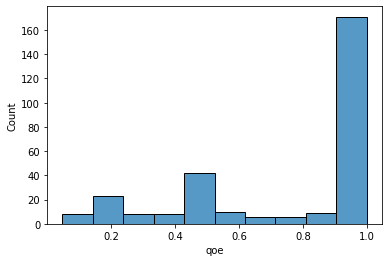

Country ID: 112


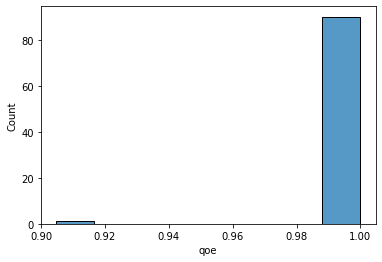

Country ID: 52


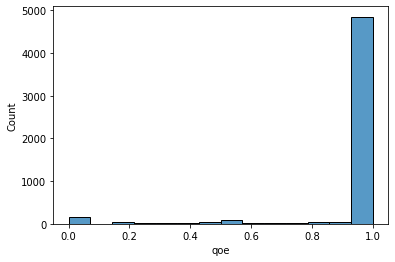

Country ID: 66


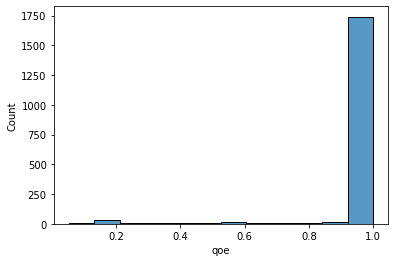

Country ID: 63


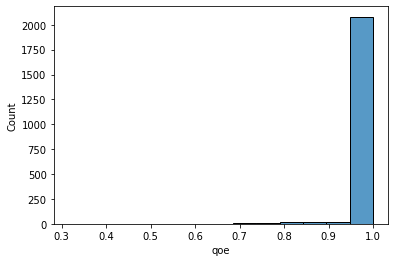

Country ID: 53


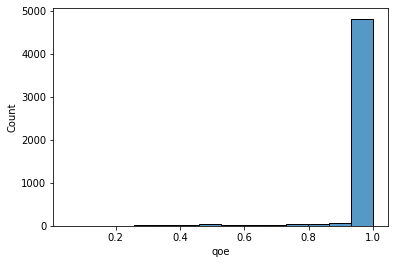

Country ID: 50


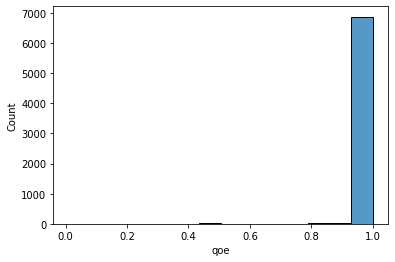

Country ID: 62


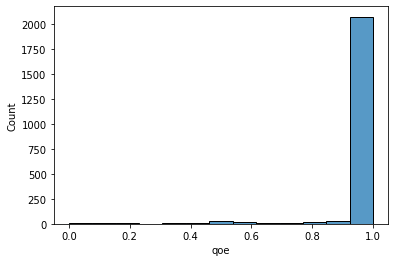

Country ID: 105


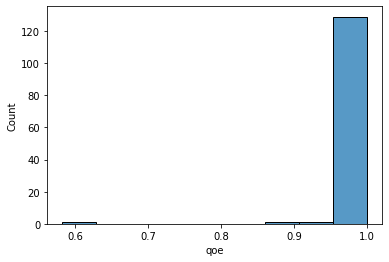

Country ID: 15


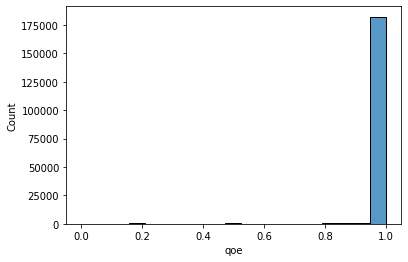

Country ID: 8


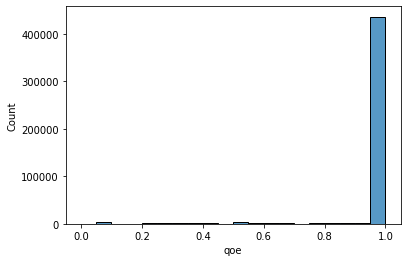

Country ID: 122


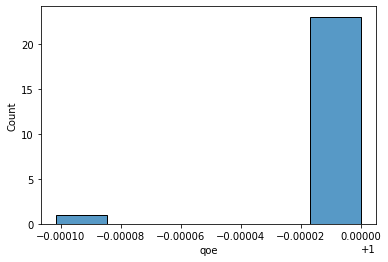

Country ID: 93


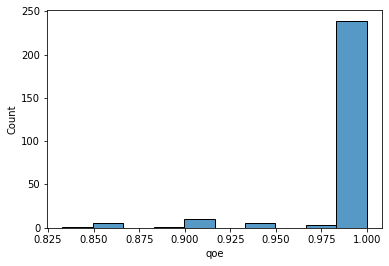

Country ID: 16


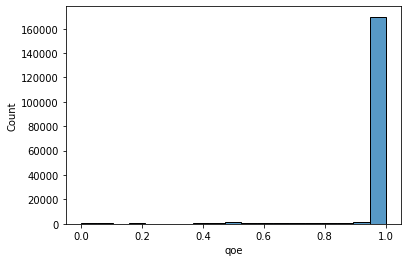

Country ID: 1


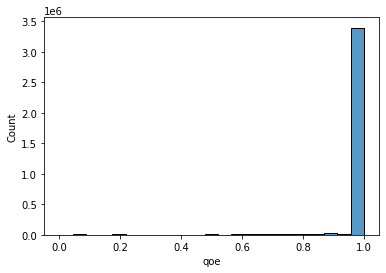

Country ID: 60


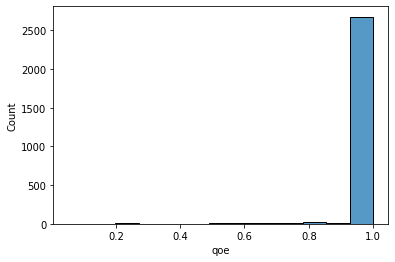

In [13]:
#Plotting using histogram for every country in a random sample.
for i in ar_a:
  print("Country ID:", i)
  sns.histplot(df["qoe"][df["country_id"]== i])
  plt.show()

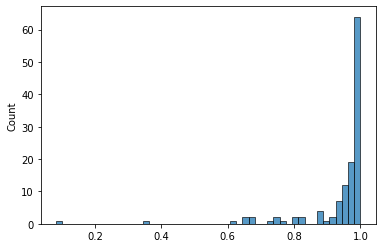

In [14]:
#Calculate the means of every country's qoe
means = []
for i in range(0,124):
  means.append(df["qoe"][df["country_id"] == i].mean())
sns.histplot(np.array(means))

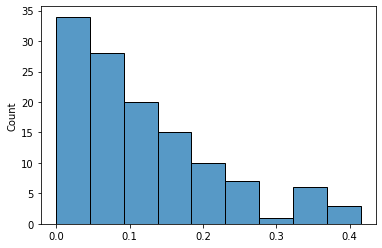

In [15]:
#Calculate the standard deviations of every country's qoe
stds = []
for i in range(0,124):
  stds.append(df["qoe"][df["country_id"] == i].std())
sns.histplot(np.array(stds))

City_id

City ID: 731


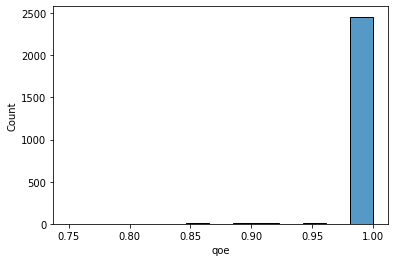

City ID: 6692


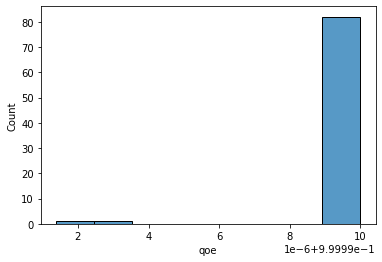

City ID: 370


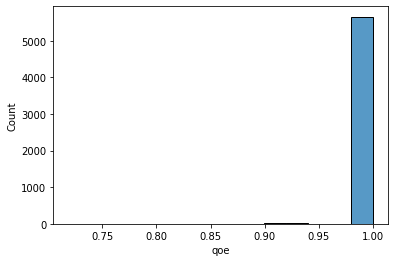

City ID: 6454


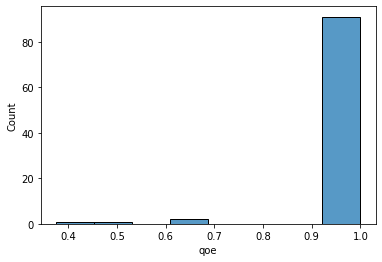

City ID: 2047


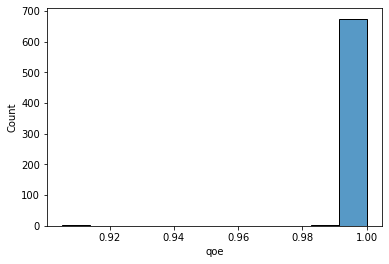

City ID: 4746


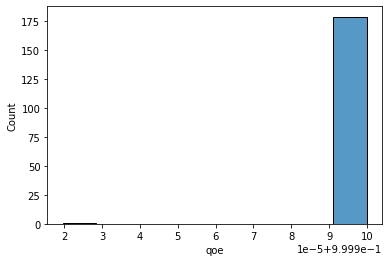

City ID: 7785


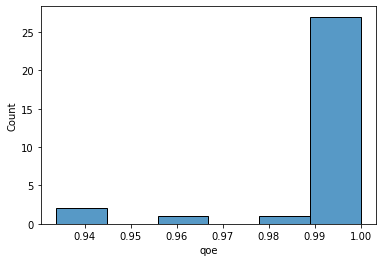

City ID: 220


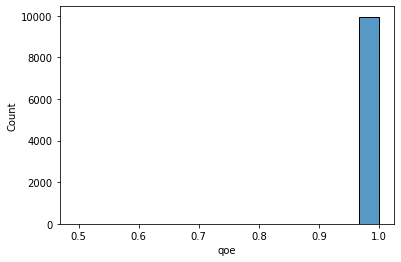

City ID: 2942


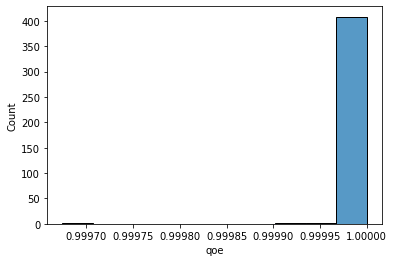

City ID: 4406


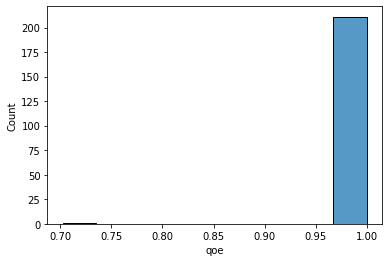

City ID: 2020


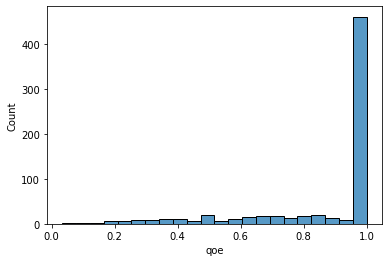

City ID: 3167


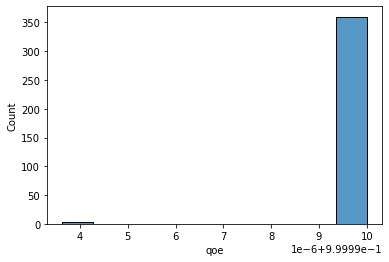

City ID: 4006


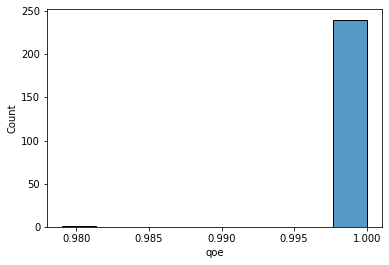

City ID: 1471


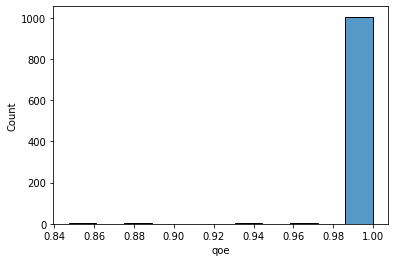

City ID: 4037


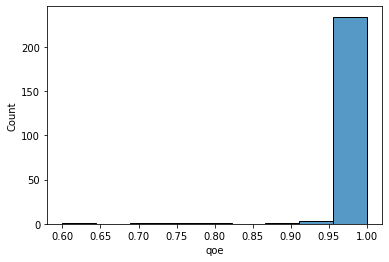

City ID: 942


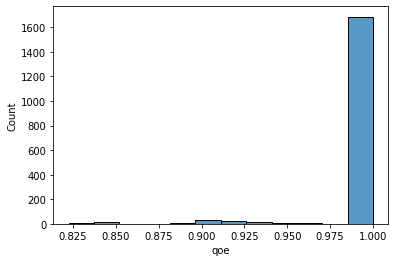

City ID: 493


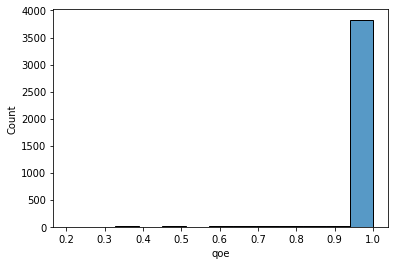

City ID: 3775


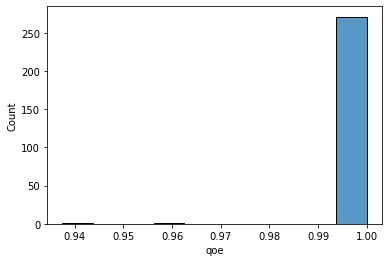

City ID: 5670


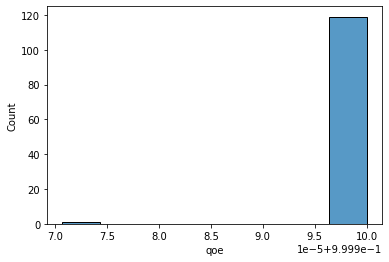

City ID: 5023


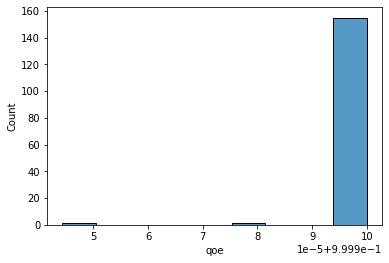

City ID: 1864


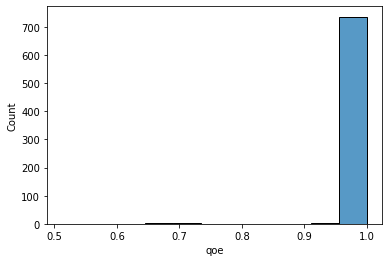

City ID: 685


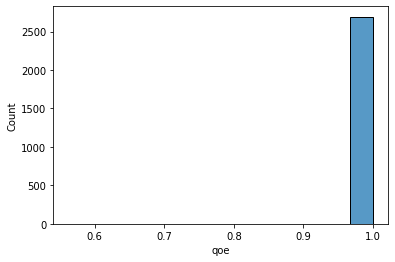

City ID: 4924


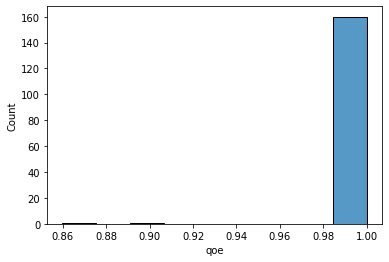

City ID: 2877


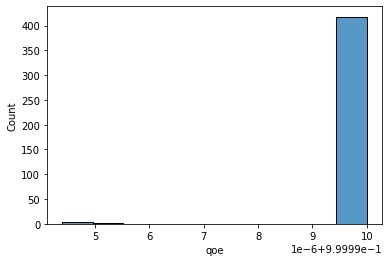

City ID: 4475


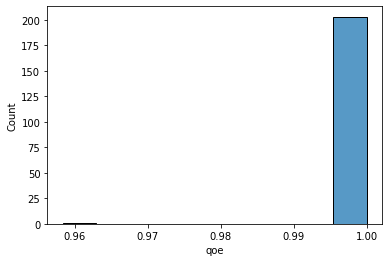

City ID: 1342


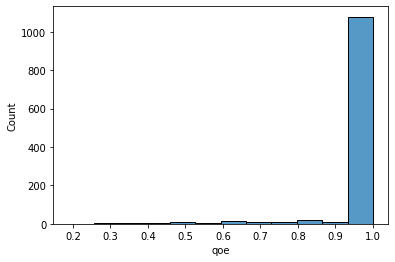

City ID: 3347


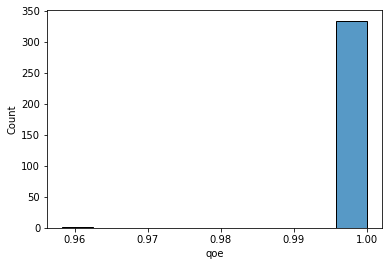

City ID: 5428


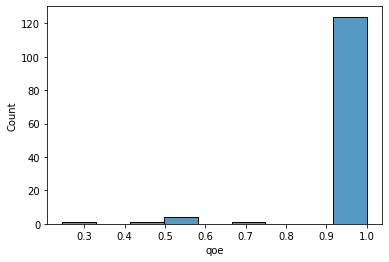

City ID: 8226


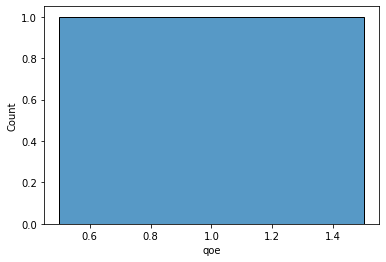

City ID: 7358


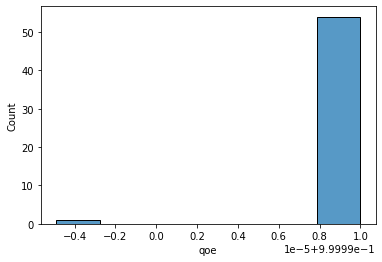

City ID: 1493


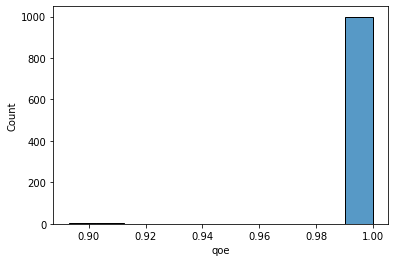

City ID: 2019


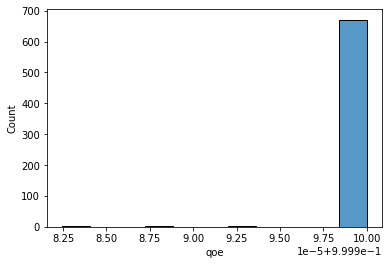

City ID: 7842


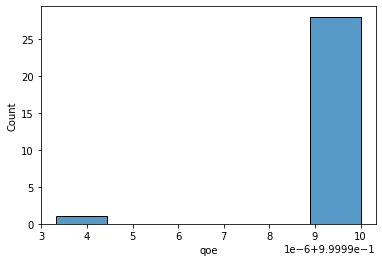

City ID: 7618


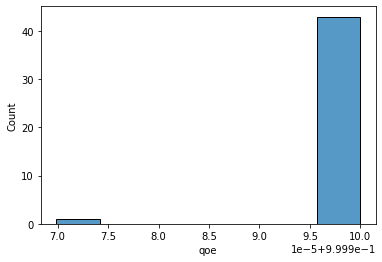

City ID: 7149


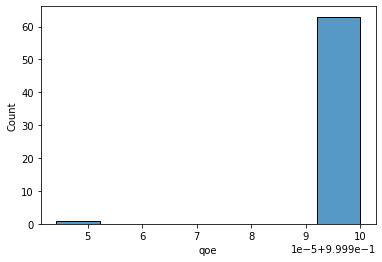

City ID: 4237


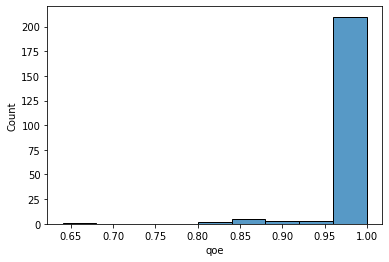

City ID: 7193


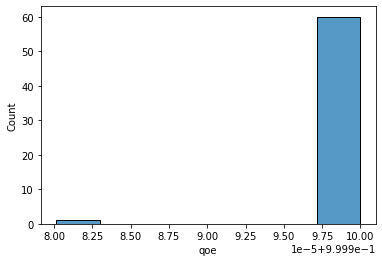

City ID: 6415


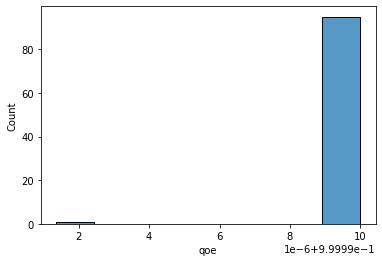

City ID: 1663


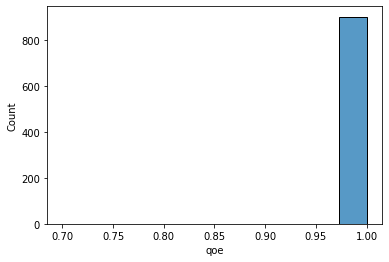

City ID: 7107


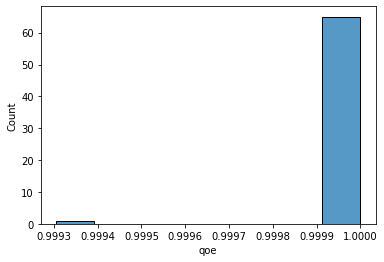

City ID: 3295


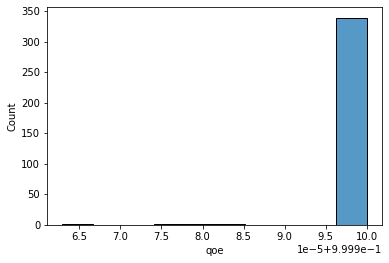

City ID: 1313


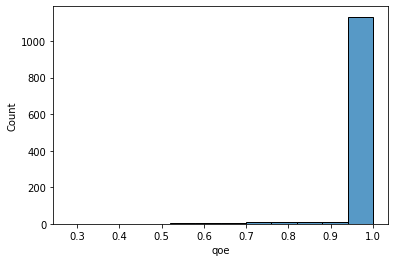

City ID: 7424


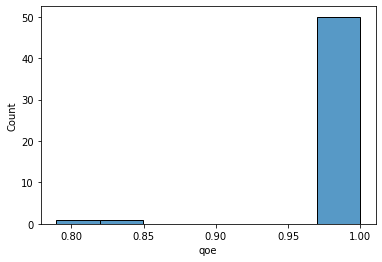

City ID: 7420


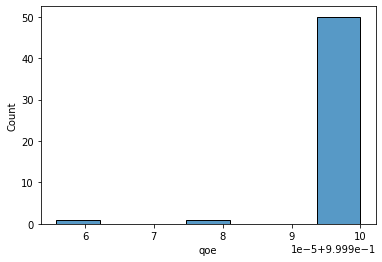

City ID: 7103


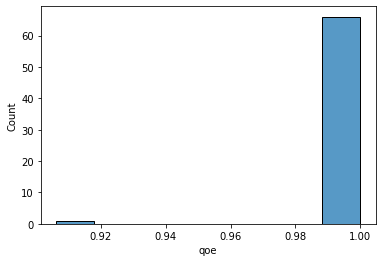

City ID: 1540


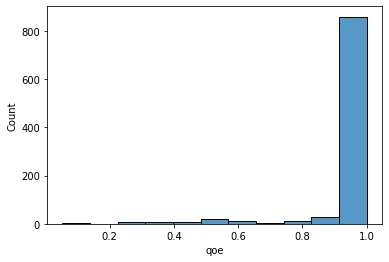

City ID: 7892


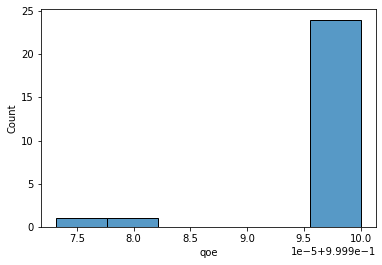

City ID: 7774


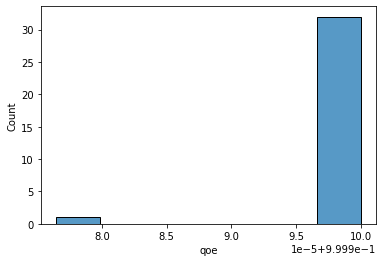

City ID: 2702


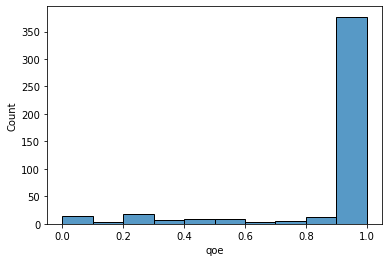

City ID: 7883


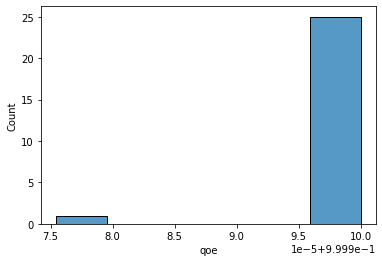

City ID: 1157


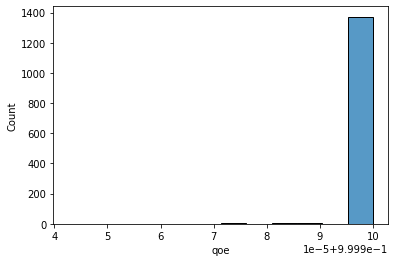

City ID: 8172


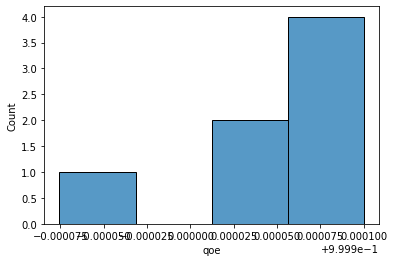

City ID: 3553


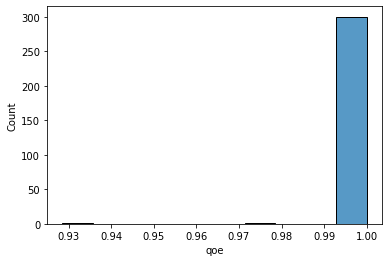

City ID: 4198


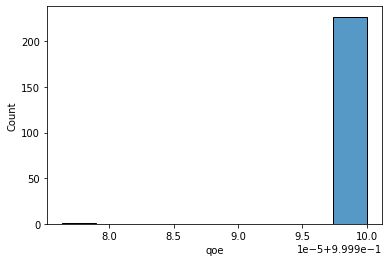

City ID: 4629


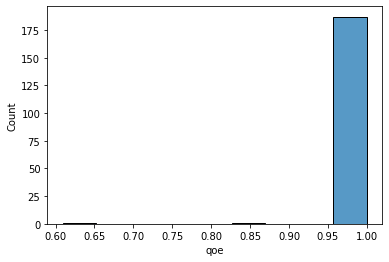

City ID: 439


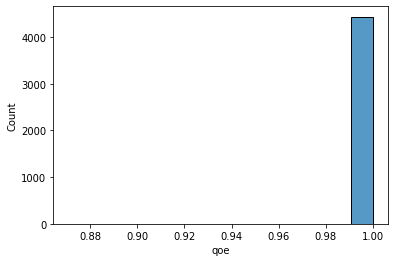

City ID: 7610


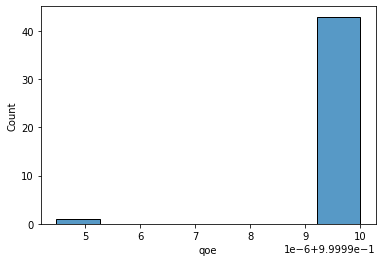

City ID: 1560


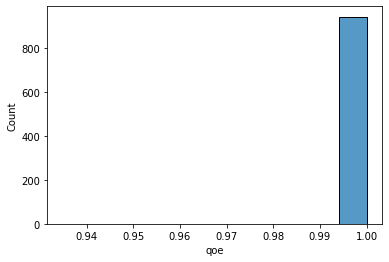

City ID: 5094


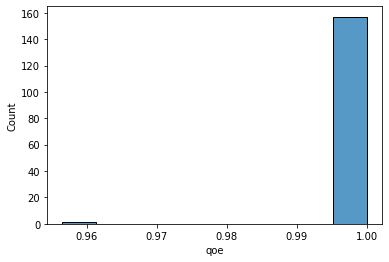

City ID: 2319


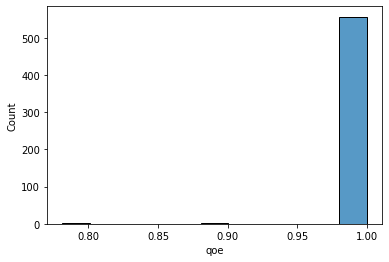

City ID: 2102


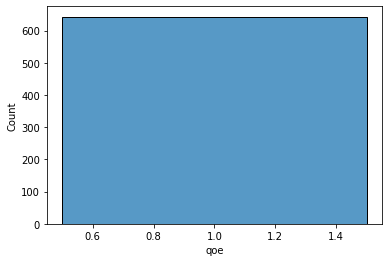

City ID: 6715


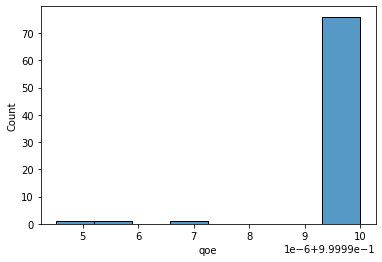

City ID: 1429


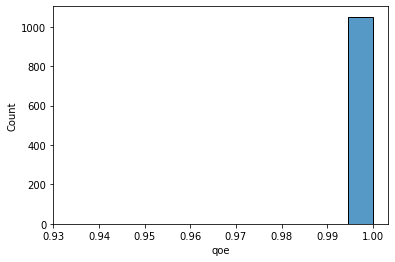

City ID: 5261


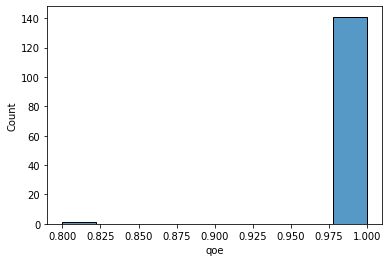

City ID: 6579


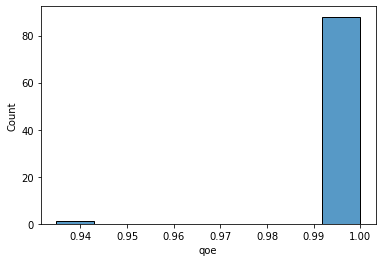

City ID: 7802


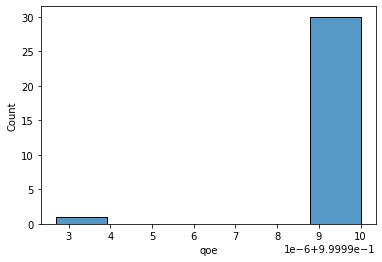

City ID: 784


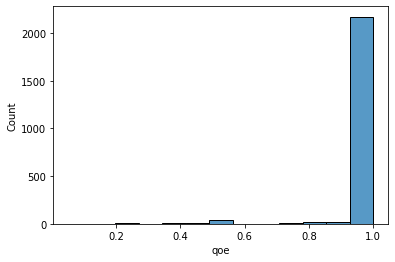

City ID: 850


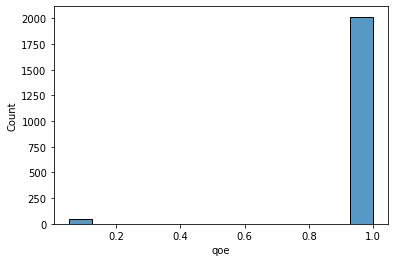

City ID: 1317


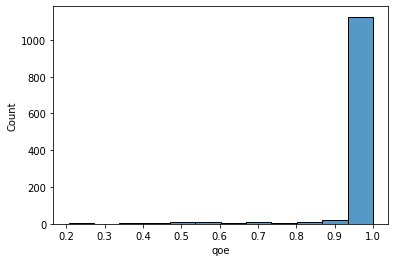

City ID: 4052


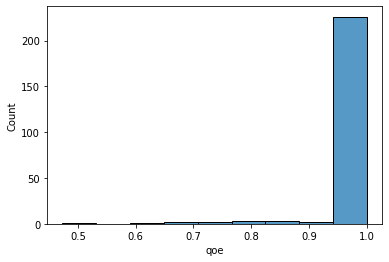

City ID: 3057


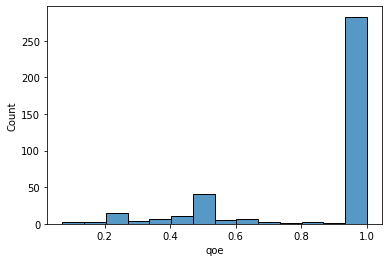

City ID: 2388


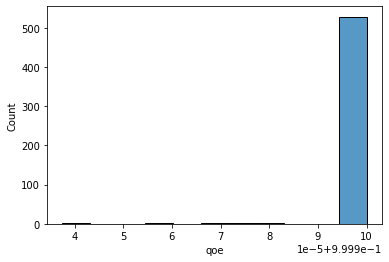

City ID: 4868


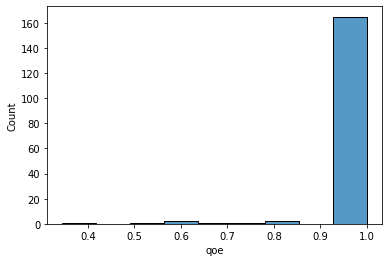

City ID: 5515


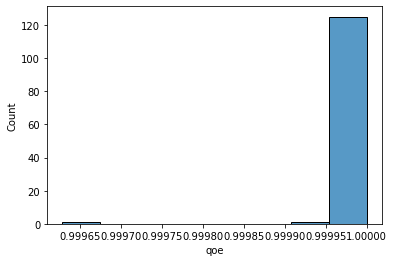

City ID: 5145


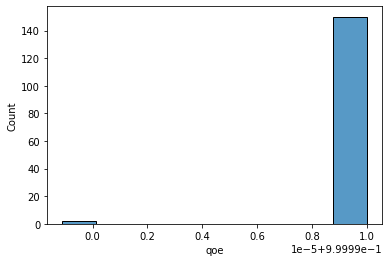

City ID: 6126


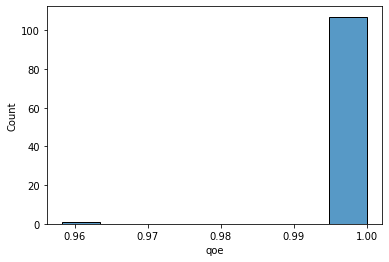

City ID: 1586


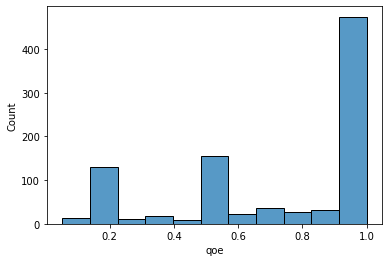

City ID: 596


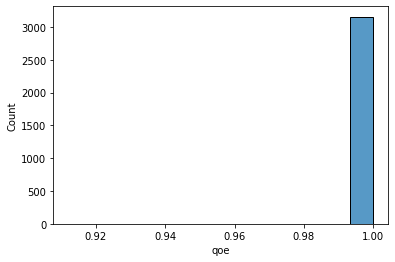

City ID: 3246


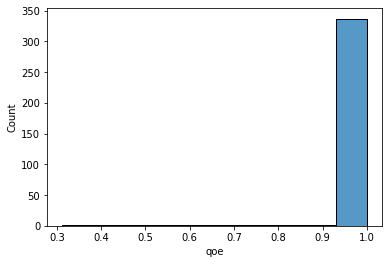

City ID: 8113


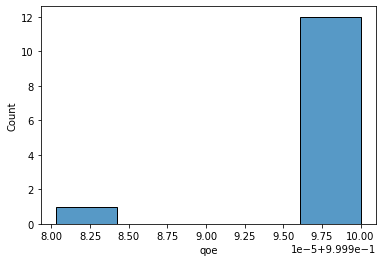

City ID: 1262


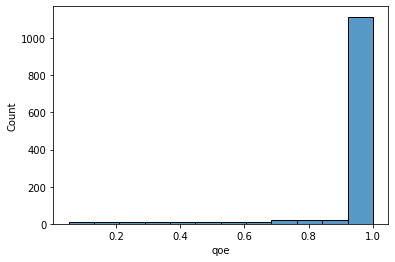

City ID: 5411


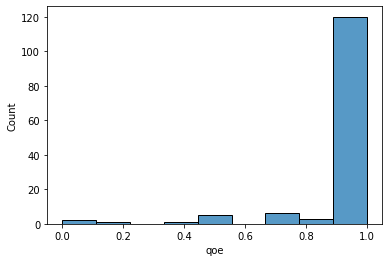

City ID: 5345


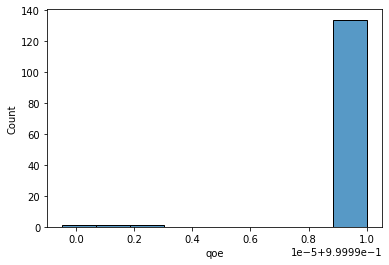

City ID: 1595


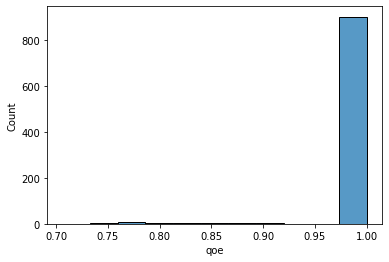

City ID: 6020


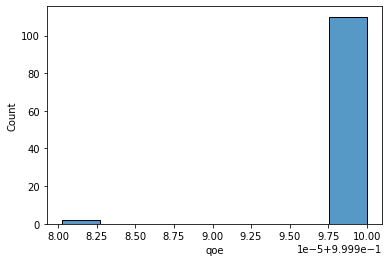

City ID: 3712


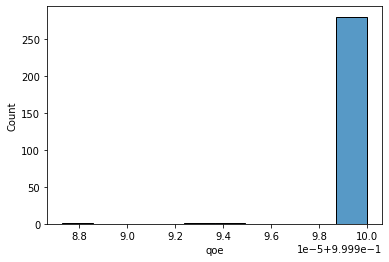

City ID: 1203


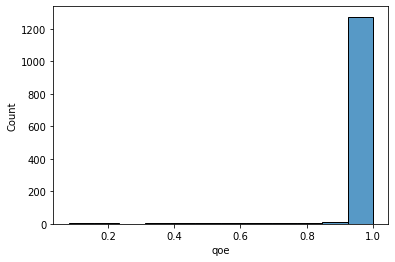

City ID: 4376


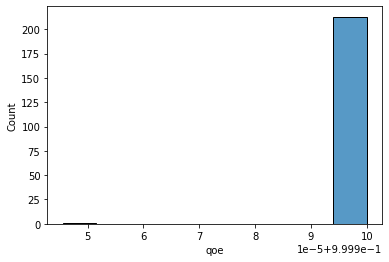

City ID: 2347


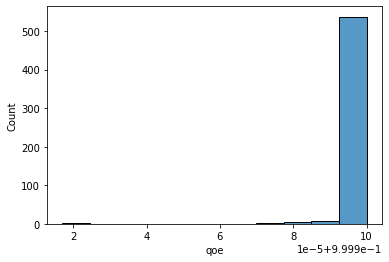

City ID: 5031


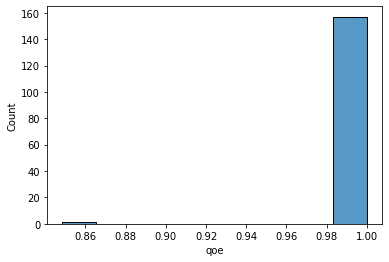

City ID: 4179


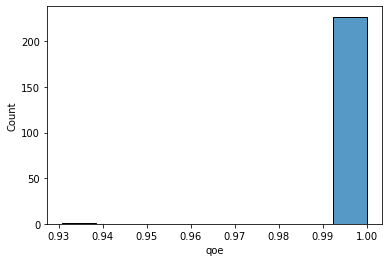

City ID: 4886


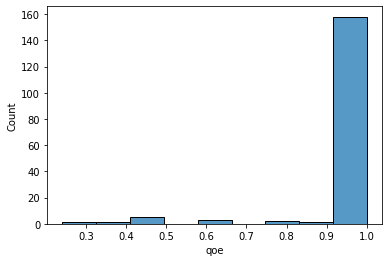

City ID: 8080


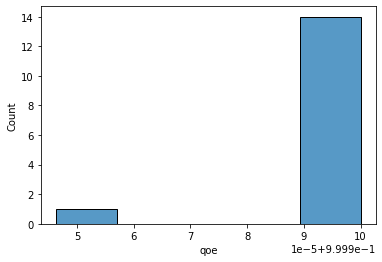

City ID: 7342


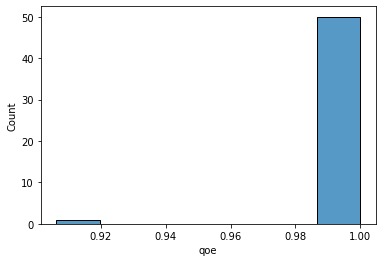

City ID: 4385


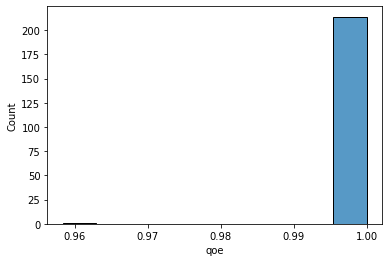

City ID: 984


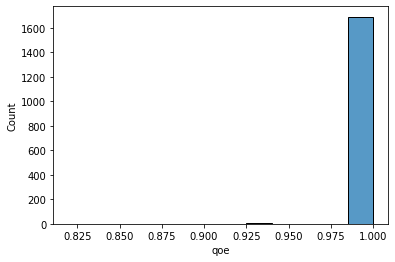

City ID: 5448


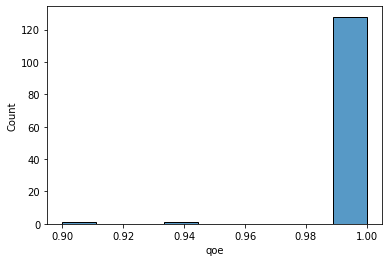

City ID: 5942


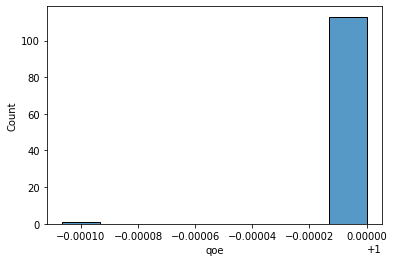

City ID: 1628


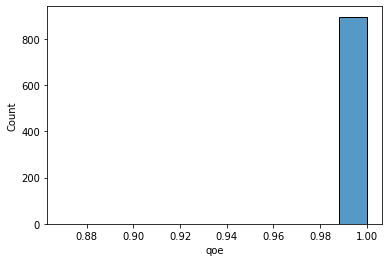

City ID: 7040


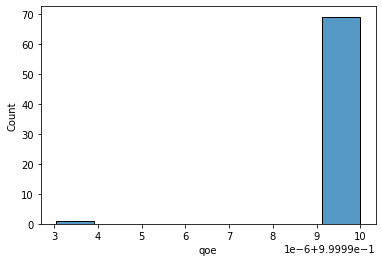

In [16]:
#Plotting using histogram for every city in a random sample.
for i in ar_b:
  print("City ID:", i)
  sns.histplot(df["qoe"][df["city_id"]== i])
  plt.show()

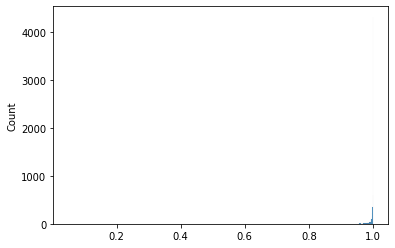

In [17]:
#Calculate the means of every city's qoe
means = []
for i in range(0,8243):
  means.append(df["qoe"][df["city_id"] == i].mean())
sns.histplot(np.array(means))

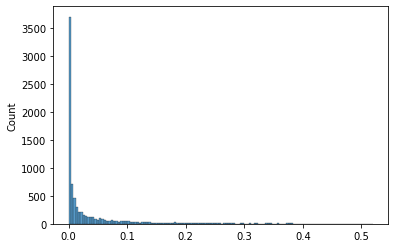

In [18]:
#Calculate the standard deviations of every city's qoe
stds = []
for i in range(0,8243):
  stds.append(df["qoe"][df["city_id"] == i].std())
sns.histplot(np.array(stds))

In [ ]:
#Calculate the percentage of the qoe that is < 0.8 for every city and print 
#those that its percentage is > 5%
good = df[df['qoe'] > 0.8]
bad = df[df['qoe'] <= 0.8]
for i in range(0,8243):
  good_count = good['qoe'][good['city_id'] == i].count()

  
  bad_count = bad['qoe'][bad['city_id'] == i].count()

  if (bad_count * 100 / (good_count + bad_count)) > 10: 

    print("City ID:", i)
    print("Bad Percentage:", bad_count * 100 / (good_count + bad_count))

## Viewers’ engagement/QoE distribution differences based on the viewer type parameter.

In [19]:
df["viewer_type"][df["viewer_type"] == "WFH"].count()

6067524

In [20]:
df["viewer_type"][df["viewer_type"] == "WFO"].count()

14547846

In [21]:
df["engagement"][df["viewer_type"] == "WFH"].describe()

count    6.067524e+06
mean     4.603649e-01
std      4.461842e-01
min      0.000000e+00
25%      0.000000e+00
50%      4.832700e-01
75%      9.000000e-01
max      1.000000e+00
Name: engagement, dtype: float64

In [22]:
df["engagement"][df["viewer_type"] == "WFO"].describe()

count    1.454785e+07
mean     4.309373e-01
std      4.458737e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-01
75%      9.000000e-01
max      1.000000e+00
Name: engagement, dtype: float64

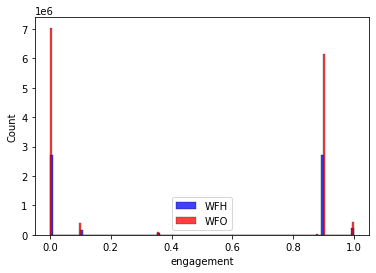

In [23]:
sns.histplot(df["engagement"][df["viewer_type"] == "WFH"], color= "blue", label= "WFH", legend = True)
sns.histplot(df["engagement"][df["viewer_type"] == "WFO"], color= "red", label= "WFO", legend = True)
plt.legend()
plt.show()

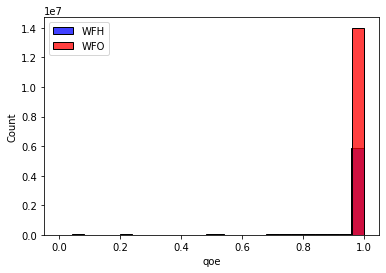

In [24]:
sns.histplot(df["qoe"][df["viewer_type"] == "WFH"], color= "blue", label= "WFH", legend = True)
sns.histplot(df["qoe"][df["viewer_type"] == "WFO"], color= "red", label= "WFO", legend = True)
plt.legend()
plt.show()

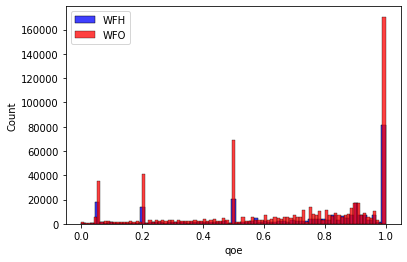

In [25]:
exclude1 = df[df["qoe"] < 1.0]

sns.histplot(exclude1["qoe"][exclude1["viewer_type"] == "WFH"], color= "blue", label= "WFH", legend = True)
sns.histplot(exclude1["qoe"][exclude1["viewer_type"] == "WFO"], color= "red", label= "WFO", legend = True)
plt.legend()
plt.show()

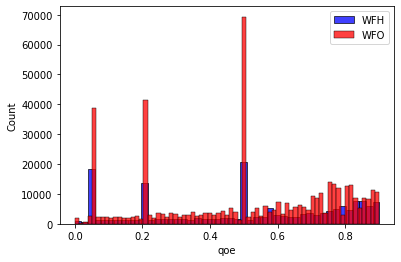

In [26]:
exclude1 = df[df["qoe"] < 0.9]

sns.histplot(exclude1["qoe"][exclude1["viewer_type"] == "WFH"], color= "blue", label= "WFH", legend = True)
sns.histplot(exclude1["qoe"][exclude1["viewer_type"] == "WFO"], color= "red", label= "WFO", legend = True)
plt.legend()
plt.show()

## Viewers’ engagement level duration over country/city/viewer type.

## Countries/Cities that follow different distributions per customer.

Customer_id: 0


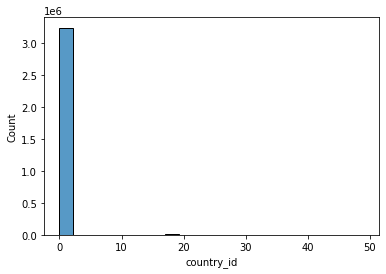

Customer_id: 1


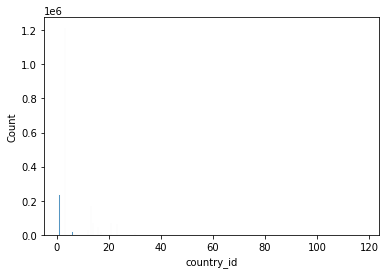

Customer_id: 2


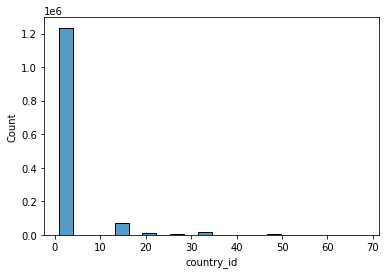

Customer_id: 3


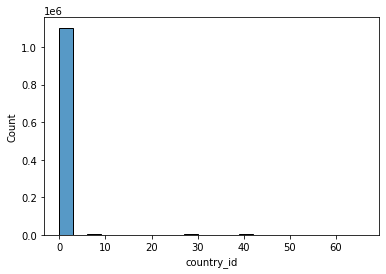

Customer_id: 4


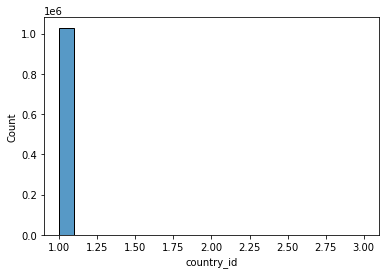

Customer_id: 5


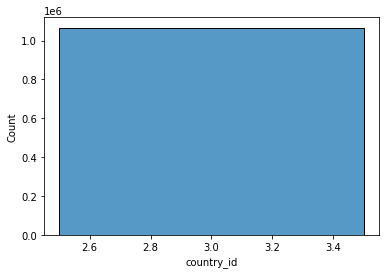

Customer_id: 6


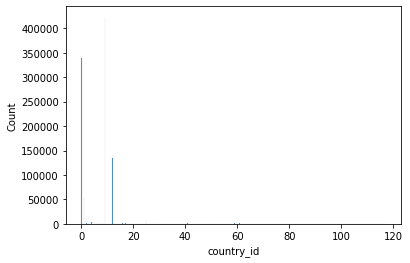

Customer_id: 7


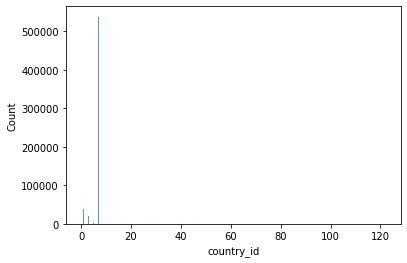

Customer_id: 8


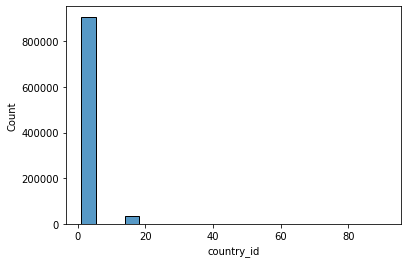

Customer_id: 9


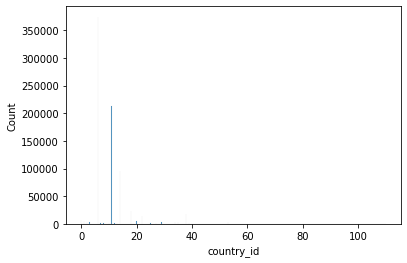

Customer_id: 10


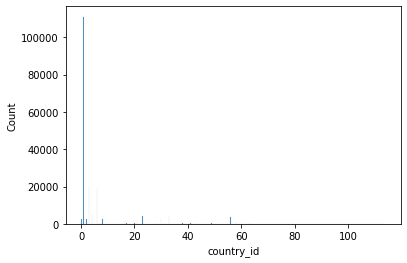

Customer_id: 11


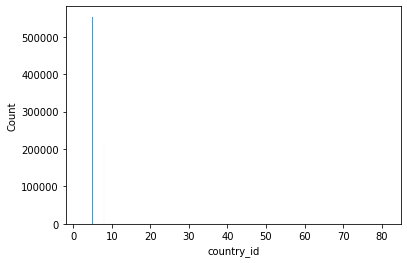

Customer_id: 12


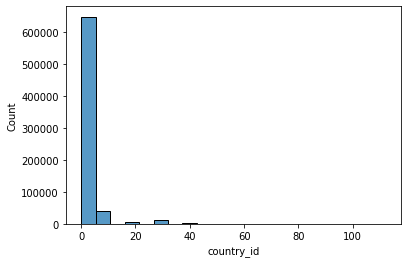

Customer_id: 13


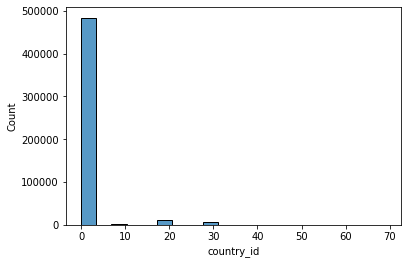

Customer_id: 14


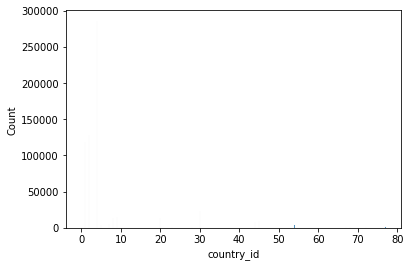

Customer_id: 15


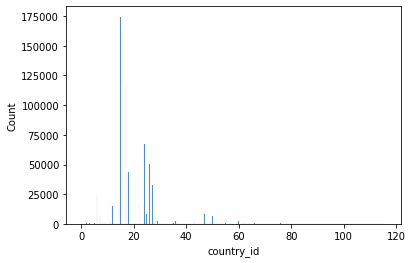

Customer_id: 16


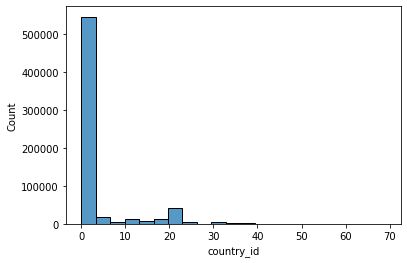

Customer_id: 17


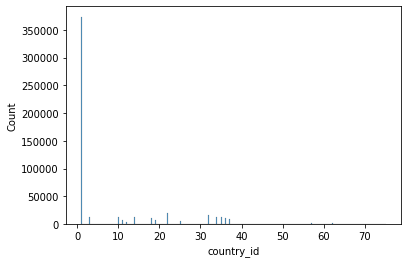

Customer_id: 18


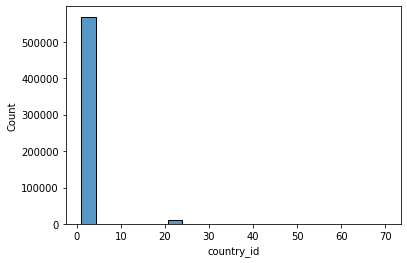

Customer_id: 19


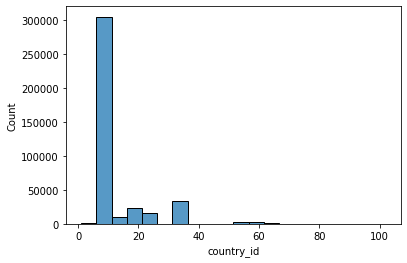

Customer_id: 20


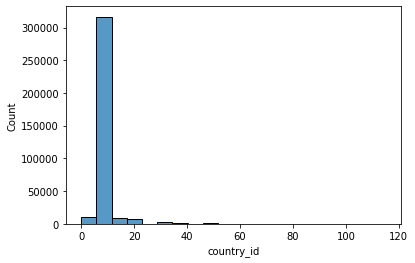

Customer_id: 21


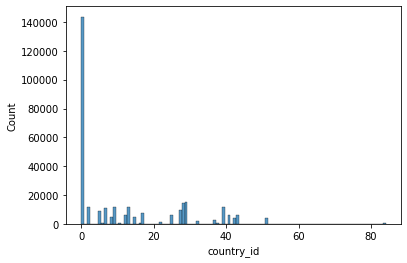

Customer_id: 22


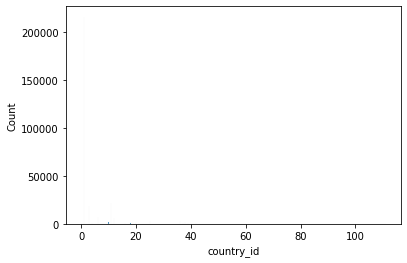

Customer_id: 23


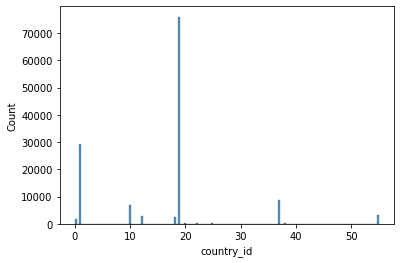

Customer_id: 24


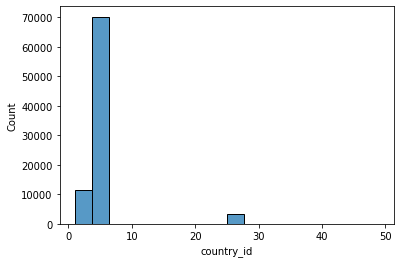

Customer_id: 25


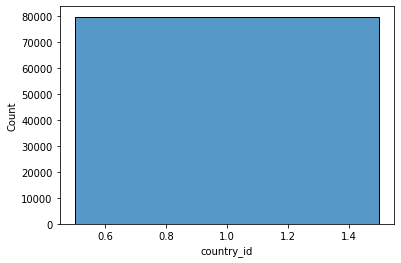

Customer_id: 26


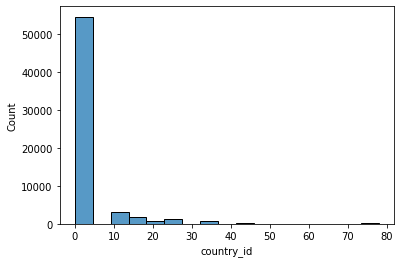

Customer_id: 27


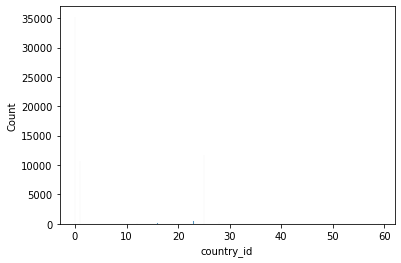

Customer_id: 28


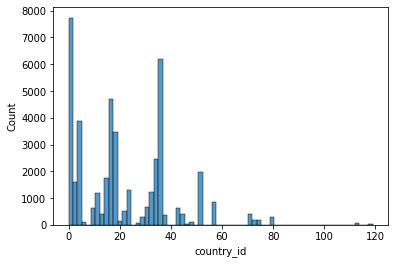

Customer_id: 29


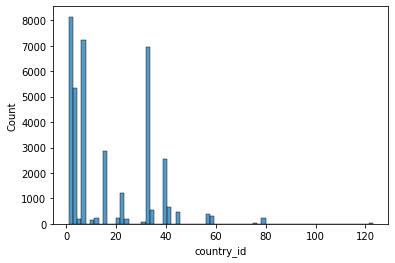

Customer_id: 30


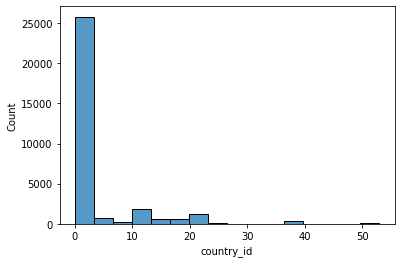

Customer_id: 31


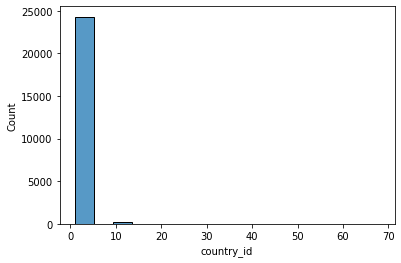

Customer_id: 32


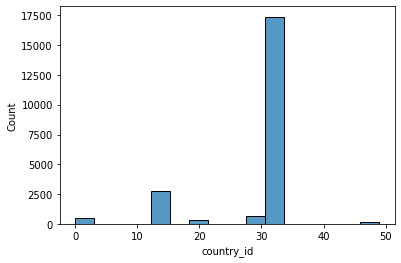

In [27]:
for i in range(0, 33):
    print("Customer_id:", i)
    sns.histplot(df['country_id'][df['customer_id'] == i])
    plt.show()

In [28]:
for i in range(0, 33):
    print("Customer_id:", i)
    print(df['country_id'][df['customer_id'] == i].value_counts())
    print(df['country_id'][df['customer_id'] == i].std())

Customer_id: 0
0     3206807
1       33787
18      18958
9         966
43        269
6         263
16        258
31        182
5         158
2         154
20        152
49        149
4         123
42         99
12         39
Name: country_id, dtype: int64
1.5215417312308115
Customer_id: 1
3      1214218
1       235894
13      170356
14       70833
21       69186
23       60958
16       46933
12       26321
17       16176
6        15301
30        9727
42        4019
25        2101
49        1072
67        1053
73         843
34         754
2          711
59         503
33         494
85         415
88         413
79         390
28         332
4          330
19         239
96         239
66         237
89         226
81         224
68         221
99         199
100        183
103        173
31         158
20         152
104        146
52         128
8          111
76         110
95         109
55         105
44         102
63         101
74          85
5           84
45          76
90   

Customer_id: 0


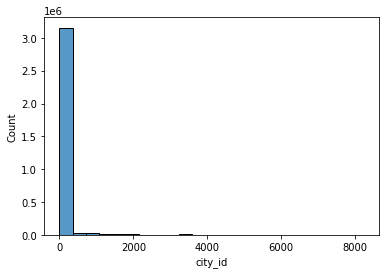

Customer_id: 1


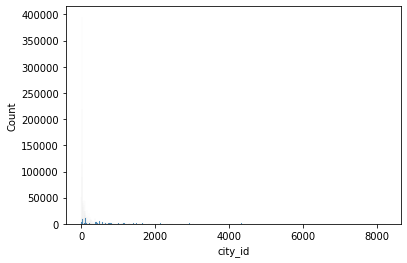

Customer_id: 2


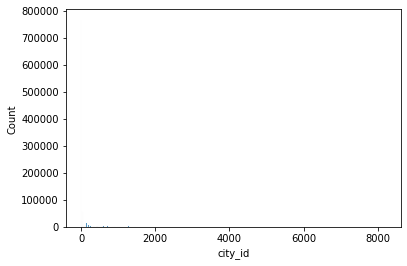

Customer_id: 3


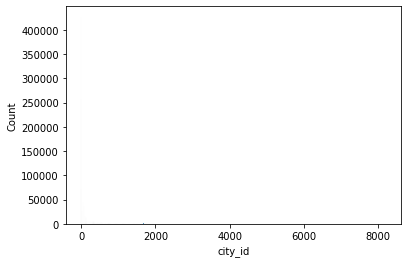

Customer_id: 4


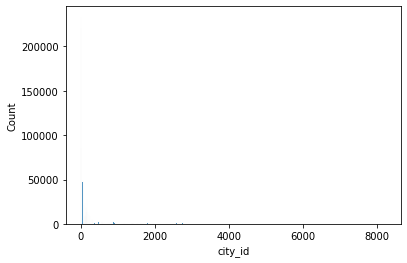

Customer_id: 5


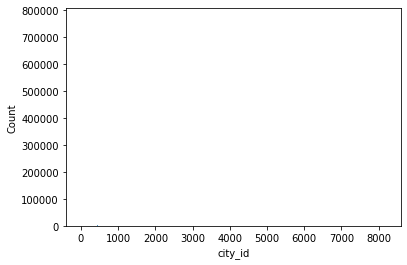

Customer_id: 6


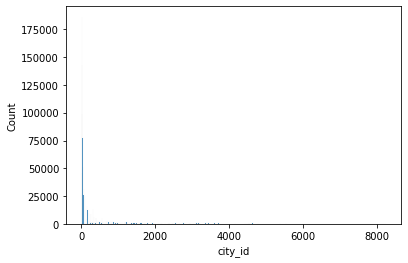

Customer_id: 7


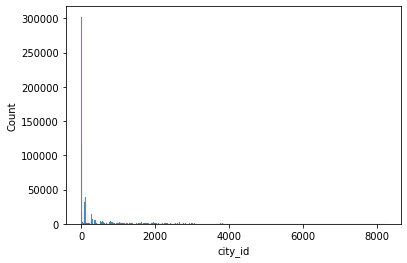

Customer_id: 8


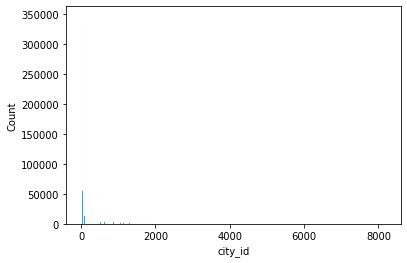

Customer_id: 9


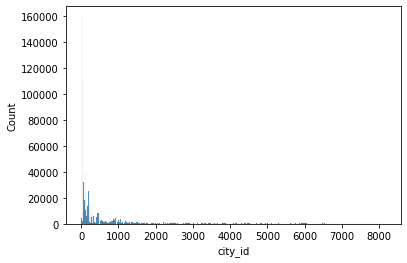

Customer_id: 10


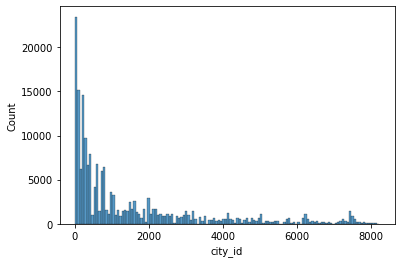

Customer_id: 11


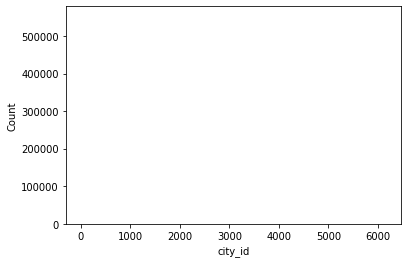

Customer_id: 12


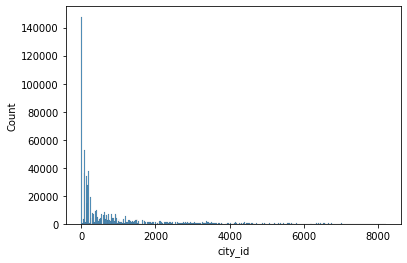

Customer_id: 13


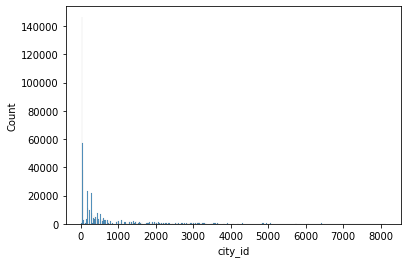

Customer_id: 14


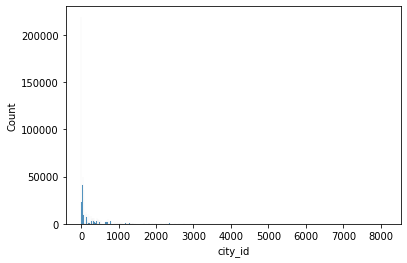

Customer_id: 15


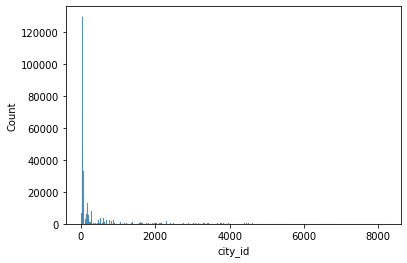

Customer_id: 16


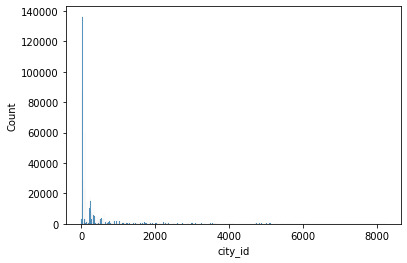

Customer_id: 17


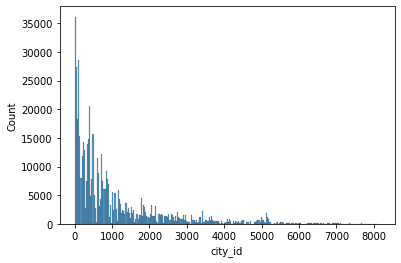

Customer_id: 18


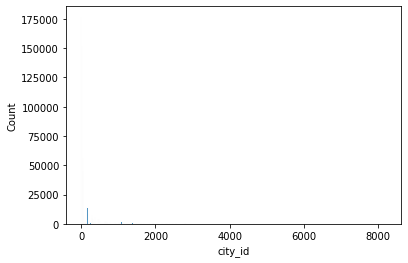

Customer_id: 19


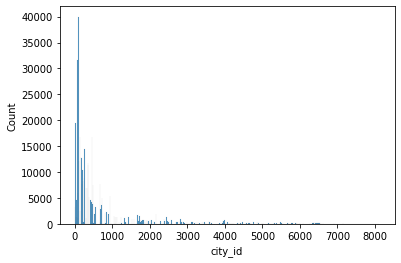

Customer_id: 20


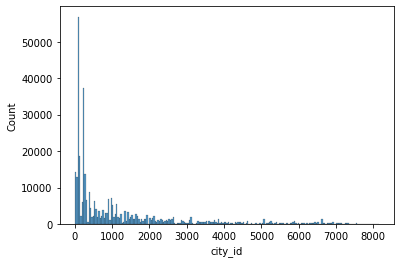

Customer_id: 21


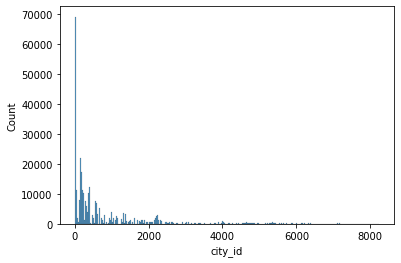

Customer_id: 22


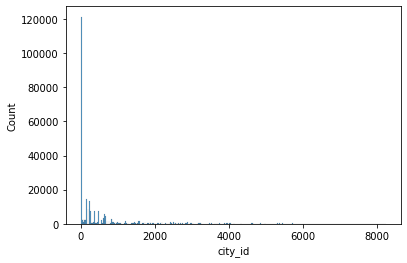

Customer_id: 23


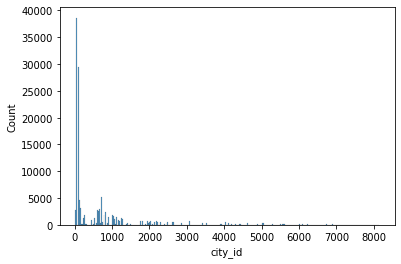

Customer_id: 24


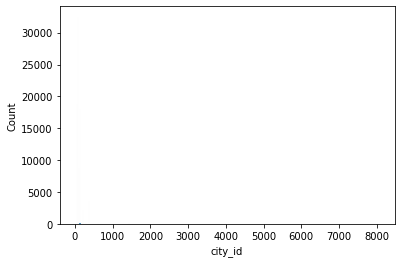

Customer_id: 25


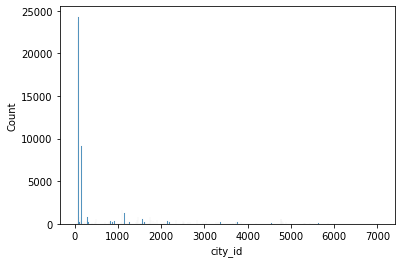

Customer_id: 26


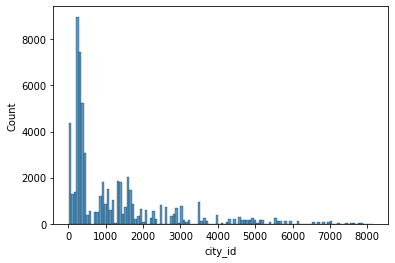

Customer_id: 27


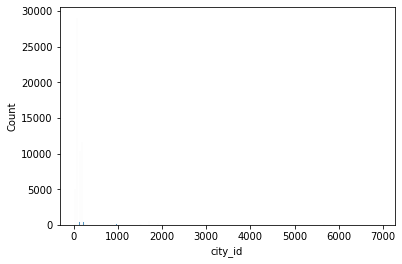

Customer_id: 28


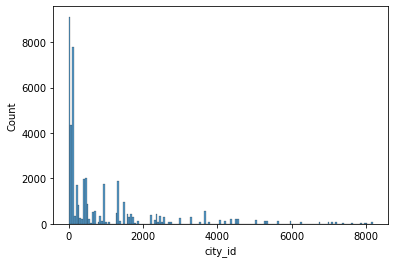

Customer_id: 29


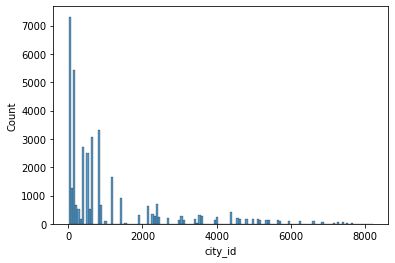

Customer_id: 30


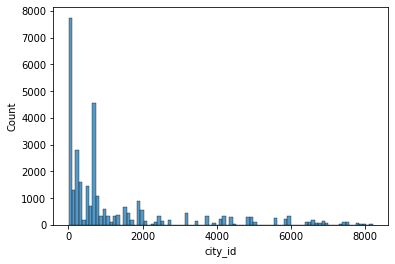

Customer_id: 31


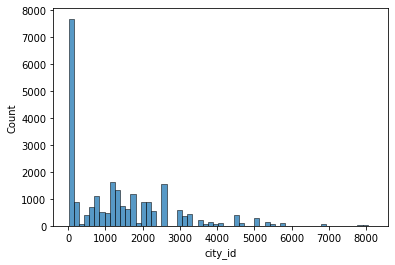

Customer_id: 32


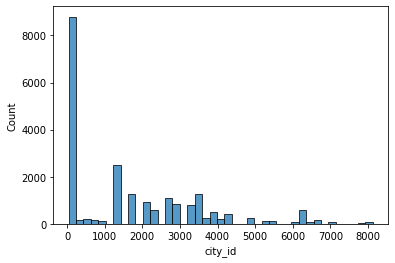

In [29]:
for i in range(0, 33):
    print("Customer_id:", i)
    sns.histplot(df['city_id'][df['customer_id'] == i])
    plt.show()

In [30]:
for i in range(0, 33):
    print("Customer_id:", i)
    print(df['city_id'][df['customer_id'] == i].mode())
    print(df['country_id'][df['customer_id'] == i].std())

Customer_id: 0
0    0
dtype: int64
1.5215417312308115
Customer_id: 1
0    12
dtype: int64
7.794554759630972
Customer_id: 2
0    1
dtype: int64
6.0991981384242955
Customer_id: 3
0    5
dtype: int64
3.792033637985326
Customer_id: 4
0    9
dtype: int64
0.05737586885855116
Customer_id: 5
0    2
dtype: int64
0.0
Customer_id: 6
0    13
dtype: int64
6.770658220863863
Customer_id: 7
0    7
dtype: int64
9.12407592789792
Customer_id: 8
0    4
dtype: int64
2.6982049742699954
Customer_id: 9
0    15
dtype: int64
8.136018986848375
Customer_id: 10
0    56
dtype: int64
12.409716930763768
Customer_id: 11
0    3
dtype: int64
1.8794970614911335
Customer_id: 12
0    17
dtype: int64
5.149690443011538
Customer_id: 13
0    26
dtype: int64
5.197270974941415
Customer_id: 14
0    1
dtype: int64
10.61830994611536
Customer_id: 15
0    33
dtype: int64
9.170817280052876
Customer_id: 16
0    31
dtype: int64
6.695074166040019
Customer_id: 17
0    80
dtype: int64
12.128862528697237
Customer_id: 18
0    6
dtype: int64


## Correlations between the data points mentioned in Section 2.

In [31]:
corr = df.corr(method='spearman', min_periods=1) #'spearman' correlation
corr.style.background_gradient(cmap='bone')

,customer_id,event_id,viewer_id,city_id,country_id,qoe,engagement,buffer_ms,day_of_week,day_of_year,month_of_year,nmsm
customer_id,1.000000,0.544218,0.236653,0.511425,0.421271,-0.009128,0.019483,0.009252,-0.299596,-0.037392,-0.068883,0.063599
event_id,0.544218,1.000000,0.223795,0.380613,0.417336,-0.020206,-0.000608,0.024098,-0.344465,-0.003676,-0.045451,0.049054
viewer_id,0.236653,0.223795,1.000000,0.233786,0.279180,-0.066979,-0.020922,0.042355,-0.132132,-0.140100,-0.152267,0.104369
city_id,0.511425,0.380613,0.233786,1.000000,0.366854,-0.028136,0.035661,0.017218,-0.284152,-0.067629,-0.077876,0.111904
country_id,0.421271,0.417336,0.279180,0.366854,1.000000,-0.041048,0.075730,0.014971,-0.227579,-0.010060,-0.032766,-0.063146
qoe,-0.009128,-0.020206,-0.066979,-0.028136,-0.041048,1.000000,0.003675,-0.575999,0.030234,0.030332,0.031037,-0.022338
engagement,0.019483,-0.000608,-0.020922,0.035661,0.075730,0.003675,1.000000,-0.000843,-0.015818,0.046844,0.041211,-0.058624
buffer_ms,0.009252,0.024098,0.042355,0.017218,0.014971,-0.575999,-0.000843,1.000000,-0.015052,-0.018389,-0.019723,0.003936
day_of_week,-0.299596,-0.344465,-0.132132,-0.284152,-0.227579,0.030234,-0.015818,-0.015052,1.000000,-0.010221,-0.011971,-0.283218
day_of_year,-0.037392,-0.003676,-0.140100,-0.067629,-0.010060,0.030332,0.046844,-0.018389,-0.010221,1.000000,0.985278,-0.150480
